In [1]:
import numpy as np
import math
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap
from matplotlib.patches import FancyArrowPatch
from scipy.special import softmax
from funcs import *

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Loading on device: {device}")

# Create a custom colormap that centers 'cividis' with white at zero
cividis_with_white = LinearSegmentedColormap.from_list(
    'cividis_white_center', 
    ['#0D2758', 'white', '#A32015'],  # Colors at low, middle, and high points in 'cividis'
    N=256
)

Loading on device: cpu


## Plot Difference between Approximation Loss and True Loss

In [2]:
d = 5
var = 0.1
L = 40

loss_ls = np.load(f"saved_models/loss_L{L}d{5}Var{var}.npy")
approx_loss_ls = np.load(f"saved_models/approx_loss_L{L}d{5}Var{var}.npy")

omega_ls = np.linspace(0, 0.2, 20)
mu_ls = np.linspace(0, 6, 20)

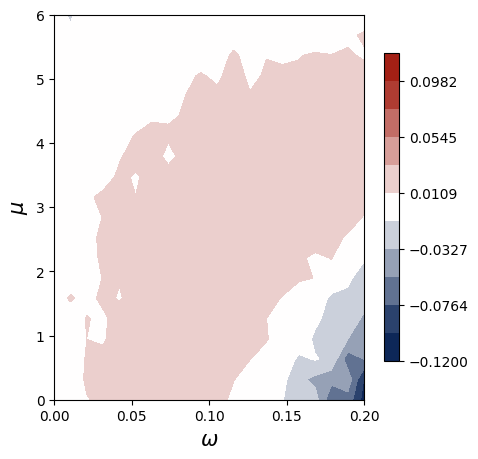

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose omega_ls and mu_ls are your 1D arrays (already defined),
# and loss_ls and approx_loss_ls are 2D arrays of shape
# (len(mu_ls), len(omega_ls)).

# 1. Build the coordinate grid:
Omega, Mu = np.meshgrid(omega_ls, mu_ls)

# 2. Compute the quantity you want to contour:
Z = loss_ls - approx_loss_ls

# 3. Create a figure, do contour/contourf:
plt.figure(figsize=(5, 5))

# Choose how many contour levels (or pass a list of levels).  
# Also specify vmin/vmax just as you did in imshow:
levels = np.linspace(-0.12, 0.12, 12)  
cs = plt.contourf(Omega, Mu, Z, levels=levels, 
                  cmap=cividis_with_white, vmin=-0.1, vmax=0.1)

# 4. Add a colorbar:
plt.colorbar(cs, shrink=0.8)

# 5. Labeling:
plt.xlabel(r'$\omega$', fontsize=15)
plt.ylabel(r'$\mu$', fontsize=15)

# 6. Save and show:
#plt.savefig(f"L{L}d{5}Var{var}.pdf", format="pdf", bbox_inches='tight')
plt.show()


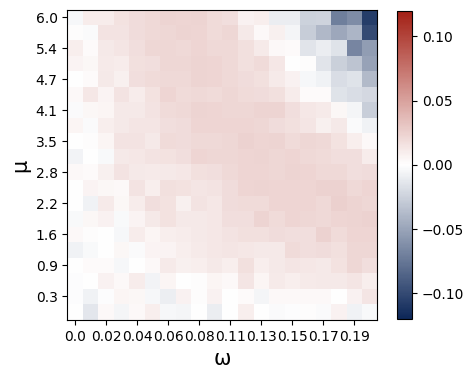

In [66]:
# Draw the 2D heatmap plot of difference between loss and approximated loss
plt.figure(figsize=(5, 5))

# Plot with centered colormap around zero
plt.imshow(loss_ls - approx_loss_ls, cmap=cividis_with_white, vmin=-0.12, vmax=0.12)
plt.colorbar(shrink=0.8)

plt.xlabel('\u03C9', fontsize=15)
plt.ylabel('\u03BC', fontsize=15)
# change x-axis labels
plt.xticks(np.arange(0, len(omega_ls), 2), np.round(omega_ls[::2], 2))
plt.yticks(np.arange(0, len(mu_ls), 2), np.round(mu_ls[::-2], 1))
#plt.title(f"L = {L}, d = {d}, $\sigma^2$ = {var}", fontsize=13)
plt.savefig(f"L{L}d{5}Var{var}.pdf", format="pdf", bbox_inches='tight')  # Save as PDF
plt.show()

In [ ]:
# Define parameters
n = 10000  # Number of iterations for averaging the loss
m = 20
# list of omega from 0 to 1
omega_ls = np.linspace(0, 0.2, m)
mu_ls = np.linspace(0, 6, m)
loss_ls = np.zeros((len(omega_ls), len(mu_ls)))  # List to store calculated loss values
approx_loss_ls = np.zeros((len(omega_ls), len(mu_ls)))
TF_Est = TFEst(L=L, d=d, var=var)  # Create an instance of TFEst with current L, d, and var

# Loop over each value in omega_ls and mu_ls
for i in range(len(omega_ls)):
    for j in range(len(mu_ls)):
        loss = 0  # Initialize loss accumulators
        approx_loss = TF_Est.approx_loss(omega=omega_ls[i] *  np.array([1, -1]), mu=mu_ls[j] *  np.array([1, -1]))
        
        # Perform n iterations to average the loss
        for k in range(n):
            # Generate beta from a normal distribution
            beta = np.random.normal(0, 1/np.sqrt(d), d)
            
            # Generate data using the data_generator function
            X, y, xq, yq = data_generator(L, d, beta, var)
            
            # Calculate the loss for the TF_Est estimator and accumulate it
            loss += (TF_Est.Est(X, y, xq, omega_ls[i] *  np.array([1, -1]), mu_ls[j] *  np.array([1, -1])) - yq) ** 2
        
        # Average the accumulated losses and store them
        loss_ls[m-1 - j, i] = loss/n
        approx_loss_ls[m-1 - j, i] = approx_loss
        
        # Print the results for the current omega and mu
        print(f"omega: {omega_ls[i]}, mu {mu_ls[j]}, loss: {loss_ls[m-1 - j, i]}, approx loss: {approx_loss_ls[m-1 - j, i]}")

omega: 0.0, mu 0.0, loss: 1.0114197697872096, approx loss: 1.0
omega: 0.0, mu 0.3157894736842105, loss: 1.0038079379162976, approx loss: 1.0
omega: 0.0, mu 0.631578947368421, loss: 0.9669350421934251, approx loss: 1.0
omega: 0.0, mu 0.9473684210526315, loss: 0.990818570219303, approx loss: 1.0
omega: 0.0, mu 1.263157894736842, loss: 1.0220026185205238, approx loss: 1.0
omega: 0.0, mu 1.5789473684210527, loss: 0.9946047572538037, approx loss: 1.0
omega: 0.0, mu 1.894736842105263, loss: 0.9798136599509718, approx loss: 1.0
omega: 0.0, mu 2.2105263157894735, loss: 0.99307834538541, approx loss: 1.0
omega: 0.0, mu 2.526315789473684, loss: 0.9593677729087962, approx loss: 1.0
omega: 0.0, mu 2.8421052631578947, loss: 0.9687765100862369, approx loss: 1.0
omega: 0.0, mu 3.1578947368421053, loss: 0.9854650640035622, approx loss: 1.0
omega: 0.0, mu 3.4736842105263155, loss: 1.0152623549119955, approx loss: 1.0
omega: 0.0, mu 3.789473684210526, loss: 0.9915885828969866, approx loss: 1.0
omega: 0.

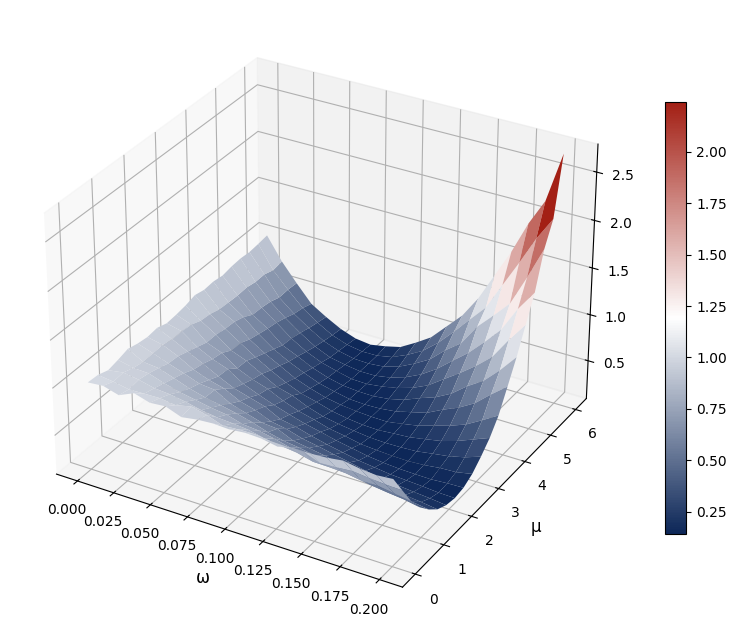

In [ ]:
cividis_with_white = LinearSegmentedColormap.from_list(
    'cividis_white_center', 
    ['#0D2758', 'white', '#A32015'],  # Colors at low, middle, and high points in 'cividis'
    N=256
)

# Create meshgrid for 3D plotting
omega_grid, mu_grid = np.meshgrid(omega_ls, mu_ls[::-1])

# Create the figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(
    omega_grid, mu_grid, loss_ls, cmap=cividis_with_white
)

# Add a color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.7)
#cbar.set_label('Difference')

# Add labels and title
ax.set_xlabel('\u03C9', fontsize=12)
ax.set_ylabel('\u03BC', fontsize=12)
#ax.set_zlabel('Loss', fontsize=12)
#ax.set_title(f"L = {L}, d = {d}, $\\sigma^2$ = {var}", fontsize=13)
plt.savefig(f"L{L}d{5}Var{var}_loss_landscape.pdf", format="pdf", bbox_inches='tight')  # Save as PDF


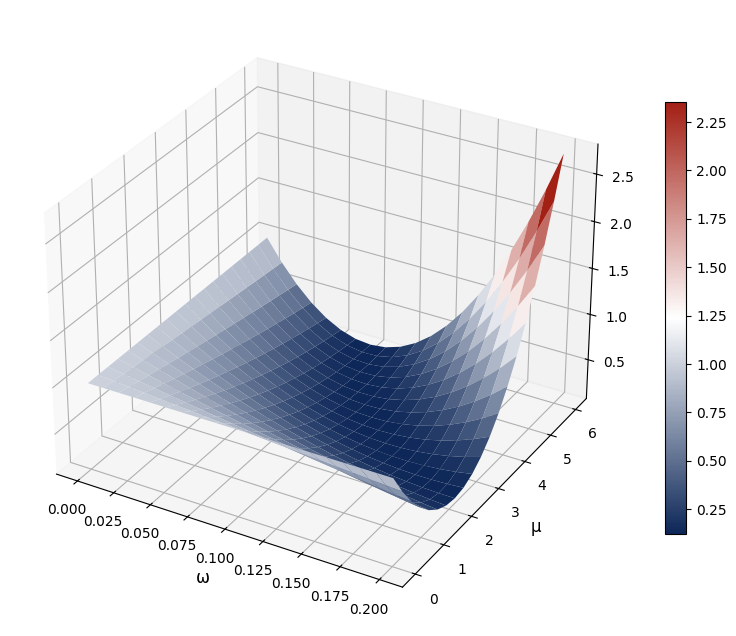

In [ ]:
# Create meshgrid for 3D plotting
omega_grid, mu_grid = np.meshgrid(omega_ls, mu_ls[::-1])

# Create the figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(
    omega_grid, mu_grid, approx_loss_ls, cmap=cividis_with_white
)

# Add a color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.7)
#cbar.set_label('Difference')

# Add labels and title
ax.set_xlabel('\u03C9', fontsize=12)
ax.set_ylabel('\u03BC', fontsize=12)
#ax.set_zlabel('Loss', fontsize=12)
#ax.set_title(f"L = {L}, d = {d}, $\\sigma^2$ = {var}", fontsize=13)
plt.savefig(f"L{L}d{5}Var{var}_approx_loss_landscape.pdf", format="pdf", bbox_inches='tight')  # Save as PDF

In [4]:
# Define parameters
n = 50000  # Number of iterations for averaging the loss

# list of omega from 0 to 1
L_ls = list(range(10, 101, 5))
loss_ls = []
omega = 0.13; mu = 3.45

# Loop over each value in omega_ls and mu_ls
for i in range(len(L_ls)):
    loss_temp_ls = [0,0,0,0,0]
        
    # Perform n iterations to average the loss
    for k in range(n):
        # Generate beta from a normal distribution
        beta = np.random.normal(0, 1/np.sqrt(d), d)
            
        # Generate data using the data_generator function
        X, y, xq, yq = data_generator(L_ls[i], d, beta, var)
            
        # Calculate the loss for the TF_Est estimator and accumulate it
        TF_Est = TFEst(L=L_ls[i], d=d, var=var) 
        loss_temp_ls[0] += (TF_Est.Est(X, y, xq, omega * np.array([1, -1]), mu *  np.array([1, -1])) - yq) ** 2
        loss_temp_ls[2] += (TF_Est.GDEst(X, y, xq, omega, mu) - yq) ** 2
        loss_temp_ls[3] += (TF_Est.DGDEst(X, y, xq, omega, mu) - yq) ** 2
        #loss_temp_ls[3] += (TF_Est.Est(X, y, xq, 0.5177*  np.array([1]), 1.5523 * np.array([1])) - yq) ** 2
        loss_temp_ls[1] += (TF_Est.Est(X, y, xq, 1/np.sqrt(d)*  np.array([1]), np.sqrt(d)/(1+(1+var)*d/L*math.e)*  np.array([1])) - yq) ** 2
        loss_temp_ls[4] += (TF_Est.RidgeEst(X, y, xq) - yq) ** 2
        
    # Average the accumulated losses and store them
    for j in range(5): loss_temp_ls[j] = loss_temp_ls[j]/n
    loss_ls.append(loss_temp_ls)
        
    # Print the results for the current omega and mu
    print(f"L: {L_ls[i]}, loss: {loss_ls[i][0]}, gd loss: {loss_ls[i][2]}, dgd loss: {loss_ls[i][3]}, kernel loss: {loss_ls[i][1]}, ridge loss: {loss_ls[i][4]}")

L: 10, loss: 0.5983683601227321, gd loss: 0.6350120231052633, dgd loss: 0.6092923294921334, kernel loss: 0.8680820604939766, ridge loss: 0.19553038975859457
L: 15, loss: 0.4498542352971711, gd loss: 0.4588404170300627, dgd loss: 0.4535944222627335, kernel loss: 0.6849871549575596, ridge loss: 0.14975336557918278
L: 20, loss: 0.3691402371331133, gd loss: 0.37286593236824767, dgd loss: 0.37080837319342347, kernel loss: 0.5881155733129427, ridge loss: 0.13306569735985185
L: 25, loss: 0.3193142835334998, gd loss: 0.3202032882381968, dgd loss: 0.3200216576393909, kernel loss: 0.5185384422869942, ridge loss: 0.12671747167395447
L: 30, loss: 0.2875623679195027, gd loss: 0.28657002942214255, dgd loss: 0.28788484038065065, kernel loss: 0.4679472636795218, ridge loss: 0.12110238049627527
L: 35, loss: 0.2649963086456186, gd loss: 0.2633512794953894, dgd loss: 0.2652738019483687, kernel loss: 0.4374357923891744, ridge loss: 0.11807360700976777
L: 40, loss: 0.242932748083726, gd loss: 0.24133661377

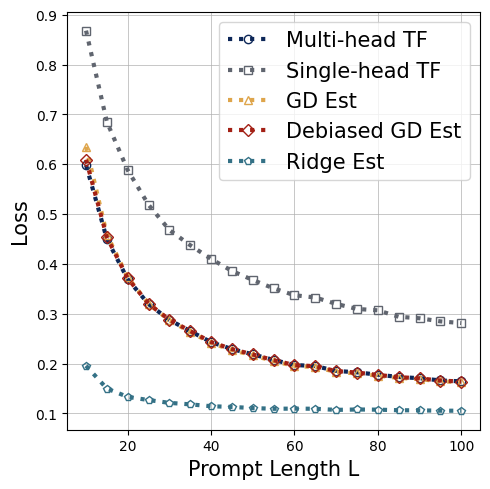

In [5]:
# Define colors, labels, and markers for the lines
colors = ['#0D2758', '#60656F', '#DEA54B', '#A32015', '#347186']
labels = ['Multi-head TF', 'Single-head TF', 'GD Est', 'Debiased GD Est', 'Ridge Est']
markers = ['o', 's', '^', 'D', 'p']  # Circle, square, triangle, diamond

# Create the plot
plt.figure(figsize=(5, 5))
for idx in range(5):
    # Plot with dotted lines and empty markers
    plt.plot(L_ls, [loss[idx] for loss in loss_ls], color=colors[idx], linestyle=':', linewidth=3,
             marker=markers[idx], markersize=6, markerfacecolor='none', markeredgecolor=colors[idx], label=labels[idx])

# Customize the plot
plt.xlabel('Prompt Length L', fontsize=15)
plt.ylabel('Loss', fontsize=15)
#plt.title('Loss vs L for Different Estimators', fontsize=14)
plt.legend(fontsize=15, loc='upper right')
plt.grid(True, linestyle='-', linewidth=0.5)
plt.tight_layout()

# Save the plot as a PDF and display it
plt.savefig("Est_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
# Define parameters
n = 50000  # Number of iterations for averaging the loss

xi = 0.2; L = 100; d=int(L*xi); var = 3
eta = 0.5/(xi*(1+var)+1)
loss_gd = 0
loss_ridge = 0


# Perform n iterations to average the loss
for k in range(n):
    # Generate beta from a normal distribution
    beta = np.random.normal(0, 1/np.sqrt(d), d)
            
    # Generate data using the data_generator function
    X, y, xq, yq = data_generator(L, d, beta, var)
            
    # Calculate the loss for the TF_Est estimator and accumulate it
    TF_Est = TFEst(L=L, d=d, var=var) 
    loss_gd += (TF_Est.GDEst(X, y, xq, 1, eta) - yq) ** 2
    loss_ridge += (TF_Est.RidgeEst(X, y, xq) - yq) ** 2
        
# Print the results for the current omega and mu
print(f"gd loss: {loss_gd/n}, ridge loss: {loss_ridge/n}")

gd loss: 3.452065873994712, ridge loss: 3.414280312747819


In [ ]:
var+xi*(1+var)/(xi*(1+var)+1)

3.4444444444444446

In [ ]:
ridge_loss(var, xi)

3.405124837953327

In [7]:
# Define the list of values for `n_head`
n_head_ls = [1, 2, 4, 8]  # Example values for `n_head`
n_layers = 1  # Fixed number of layers
d = 5  # Fixed value for `d`
device = 'cpu'  # Replace with 'cuda' if using GPU

# Initialize a list to store error lists for each model
all_model_errors = []

# Loop through each value in `n_head_ls`
for n_head in n_head_ls:
    n_sam = 100000 if n_head == 1 else 20000
    try:
        # Define the model path
        model_path = f"saved_models/Layer_{n_layers}_Head_{n_head}_d_{d}_trained_model.pth"
        
        # Load the model state_dict
        model_head_1_load = torch.load(model_path, map_location=torch.device(device), weights_only=False)
        model_head_1 = model_head_1_load['model']  # Assuming the model is saved under the key 'model'
        
        # Create the model architecture
        model = MultiHeadAttentionStack(n_layers, d + 1, n_head, 1, False)
        model.load_state_dict(model_head_1, strict=True)
        model.eval()  # Set the model to evaluation mode
        
        # Initialize a list to store errors for different `L` values for this model
        model_errors = []

        # Loop through `new_L` values
        for new_L in range(10, 101, 5):
            # Generate new data with varying `L`
            evaluate_kernel_data = LinearReg({
                "L": new_L,
                "dx": d,
                "dy": 1,
                "number_of_samples": n_sam,
                "noise_std": np.sqrt(0.1)
            })
            
            # Generate the data
            zs_q, zs, ys_q = evaluate_kernel_data.__generatedata__()
            
            # Ensure data is on the same device as the model
            zs_q, zs, ys_q = zs_q.to(device), zs.to(device), ys_q.to(device)

            # Compute the model's output
            method_output = model(zs_q, zs).squeeze(-1)

            # Compute the error using MSELoss
            loss_func = torch.nn.MSELoss()
            error = loss_func(method_output, ys_q.squeeze(-1)).item() + 0.1
            model_errors.append(error)

        # Append the error list for this model to the main list
        all_model_errors.append(model_errors)

        print(f"Errors for n_head={n_head}: {model_errors}")

    except Exception as e:
        print(f"Failed to evaluate model for n_head={n_head}. Error: {e}")
        all_model_errors.append([])  # Append an empty list for models that failed

# Print the full list of errors
print("All model errors:", all_model_errors)


Errors for n_head=1: [0.8404474020004272, 0.6656421780586242, 0.5739098846912384, 0.5092004299163818, 0.46574819684028623, 0.42884684205055235, 0.40481252074241636, 0.3845005989074707, 0.3636144459247589, 0.353547728061676, 0.34199667572975156, 0.3289244085550308, 0.317957928776741, 0.3108305692672729, 0.30251718163490293, 0.29525496661663053, 0.2888681054115295, 0.283991402387619, 0.27818859219551084]
Errors for n_head=2: [0.5730171859264374, 0.44350404143333433, 0.3696227431297302, 0.3200426012277603, 0.29083936512470243, 0.26343352198600767, 0.24086268842220307, 0.2258712410926819, 0.2179487705230713, 0.20484787821769715, 0.20193615406751633, 0.19412390738725663, 0.18775046467781067, 0.18307535201311112, 0.17761847227811814, 0.17405839115381241, 0.17268480211496354, 0.16856678426265717, 0.1635688751935959]
Errors for n_head=4: [0.5765972793102264, 0.4528696298599243, 0.3636012732982635, 0.31469555795192716, 0.28267154693603513, 0.2642070412635803, 0.24494699239730836, 0.230808696150

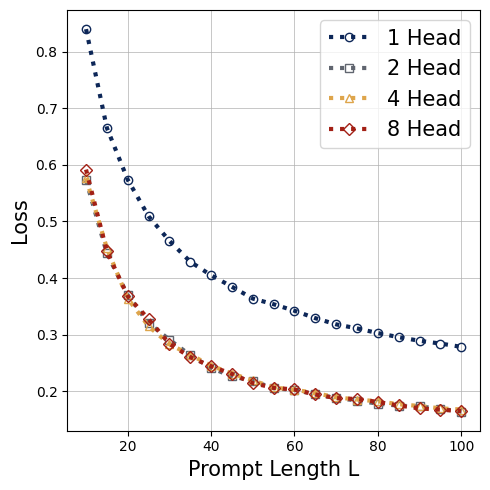

In [8]:
# Define colors, labels, and markers for the lines
colors = ['#0D2758', '#60656F', '#DEA54B', '#A32015', '#347186']
labels = [f'{n_head} Head' for n_head in n_head_ls]
markers = ['o', 's', '^', 'D', 'p'] 

# Create the plot
plt.figure(figsize=(5, 5))
for idx in range(len(all_model_errors)):
    # Plot with dotted lines and empty markers
    plt.plot(
        range(10, 101, 5), all_model_errors[idx], 
        color=colors[idx], linestyle=':', linewidth=3,
        marker=markers[idx], markersize=6, markerfacecolor='none',
        markeredgecolor=colors[idx], label=labels[idx]
    )

# Customize the plot
plt.xlabel('Prompt Length L', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=15, loc='upper right')
plt.grid(True, linestyle='-', linewidth=0.5)
plt.tight_layout()

# Save the plot as a PDF and display it
plt.savefig("Head_num_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
import numpy as np

def extract_kq_ov_details(model, d_embed, n_head, threshold=0.7):
    """
    Extract and average details from QK and OV matrices for attention heads
    where the diagonal norm ratio is above a specified threshold.

    Args:
        model (dict): State dictionary of the model containing attention layer weights.
        d_embed (int): Dimension of the embedding for each head.
        n_head (int): Number of attention heads.
        threshold (float): Threshold for filtering based on diagonal norm ratio.

    Returns:
        dict: Averages of the following for heads with diag_norm_ratio > threshold:
            - 'avg_diag_norm_ratio': Average diagonal norm ratio.
            - 'avg_diag_variance': Average diagonal variance.
            - 'avg_last_entry_square_ratio': Average last entry square ratio.
    """
    # Extract attention layer weights
    W_Q = model['attention_layer.q_proj.weight']  # Shape: (d_embed * n_head, d_embed)
    W_K = model['attention_layer.k_proj.weight']  # Shape: (d_embed * n_head, d_embed)
    W_V = model['attention_layer.v_proj.weight']  # Shape: (d_embed * n_head, d_embed)
    W_O = model['attention_layer.o_proj.weight']  # Shape: (d_embed, d_embed * n_head)

    # Ensure embedding size consistency
    assert W_Q.shape[0] == d_embed * n_head, f"Expected W_Q rows to match {d_embed * n_head}, but got {W_Q.shape[0]}"
    assert W_Q.shape[1] == d_embed, f"Expected W_Q columns to match {d_embed}, but got {W_Q.shape[1]}"

    # Store results for each head
    filtered_diag_norm_ratios = []
    filtered_diag_variances = []
    filtered_last_entry_square_ratios = []

    for head_idx in range(n_head):
        # Slice the weights for this head
        W_Q_h = W_Q[head_idx * d_embed:(head_idx + 1) * d_embed, :]  # Shape: (d_embed, d_embed)
        W_K_h = W_K[head_idx * d_embed:(head_idx + 1) * d_embed, :]  # Shape: (d_embed, d_embed)
        W_V_h = W_V[head_idx * d_embed:(head_idx + 1) * d_embed, :]  # Shape: (d_embed, d_embed)
        W_O_h = W_O[:, head_idx * d_embed:(head_idx + 1) * d_embed]  # Shape: (d_embed, d_embed)

        # Compute QK and OV matrices
        QK = (W_K_h.T @ W_Q_h) / np.sqrt(d_embed)  # Scaled QK matrix
        OV = W_V_h.T @ W_O_h.T  # OV matrix
        QK = QK[:-1, :-1]  # Remove last row and column from QK

        # Convert to numpy if applicable
        QK_np = QK.cpu().detach().numpy() if hasattr(QK, 'cpu') else QK
        OV_np = OV.cpu().detach().numpy() if hasattr(OV, 'cpu') else OV

        # Extract diagonal elements of QK
        diag_elements = np.diag(QK_np).tolist()  # Diagonal elements as a list

        # Compute norm of diagonal vector and Frobenius norm of QK
        diag_norm = np.linalg.norm(diag_elements)
        frob_norm = np.linalg.norm(QK_np)
        diag_norm_ratio = diag_norm / frob_norm

        # Compute variance of diagonal elements
        diag_variance = np.var(diag_elements)/np.mean(diag_elements)**2

        # Compute square of the last diagonal entry / norm of diagonal vector
        last_entry_square_ratio = abs(OV_np[-1]) / np.linalg.norm(OV_np)

        # Filter based on threshold
        if diag_norm_ratio > threshold:
            filtered_diag_norm_ratios.append(diag_norm_ratio)
            filtered_diag_variances.append(diag_variance)
            filtered_last_entry_square_ratios.append(last_entry_square_ratio.item())

    # Compute averages for the filtered heads
    avg_diag_norm_ratio = np.mean(filtered_diag_norm_ratios) if filtered_diag_norm_ratios else None
    avg_diag_variance = np.mean(filtered_diag_variances) if filtered_diag_variances else None
    avg_last_entry_square_ratio = np.mean(filtered_last_entry_square_ratios) if filtered_last_entry_square_ratios else None

    return {
        'avg_diag_norm_ratio': avg_diag_norm_ratio,
        'avg_diag_variance': avg_diag_variance,
        'avg_last_entry_square_ratio': avg_last_entry_square_ratio
    }


In [ ]:
# Load the .pth file
ratio = []
variance = []
ov_ratio = []
for n_head in [1,2,4,8]:
    n_layers, d = 1,5
    model_path = f"saved_models/Layer_{n_layers}_Head_{n_head}_d_{d}_trained_model.pth"
    model_head_1_load = torch.load(model_path, map_location=torch.device(device), weights_only=True)
    model_head_1 = model_head_1_load['model']
    result = extract_kq_ov_details(model_head_1, 6, n_head)
    ratio.append(result['avg_diag_norm_ratio']); variance.append(result['avg_diag_variance']); ov_ratio.append(result['avg_last_entry_square_ratio'])

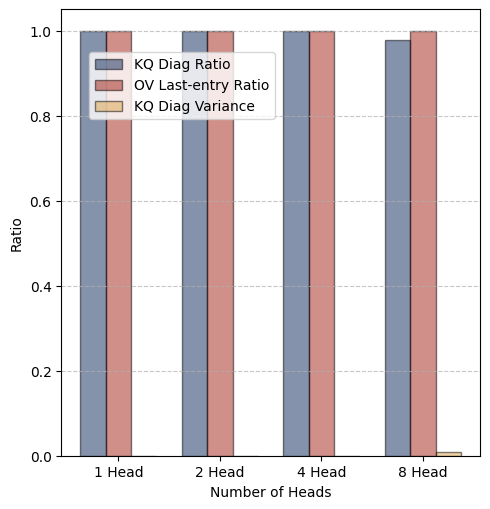

In [ ]:
colors= ['#0D2758','#A32015', "#60656F", "#DEA54B"]

# Example data (replace with your actual computed values)
x_positions = ['1 Head', '2 Head', '4 Head', '8 Head']  # Corresponds to the n_head values

# Create an array of evenly spaced x-axis positions
x_positions = np.arange(len(x_positions))

# Define the bar width
bar_width = 0.25

# Adjust positions for the grouped bars
positions1 = x_positions - bar_width
positions2 = x_positions
positions3 = x_positions + bar_width

# Plot the bar chart
plt.figure(figsize=(5, 5))
plt.bar(positions1, ratio, width=bar_width, label='KQ Diag Ratio', color=colors[0], alpha=0.5, edgecolor='black')
plt.bar(positions2, ov_ratio, width=bar_width, label='OV Last-entry Ratio', color=colors[1], alpha=0.5, edgecolor='black')
plt.bar(positions3, variance, width=bar_width, label='KQ Diag Variance', color=colors[3], alpha=0.5, edgecolor='black')

# Customize the plot
plt.ylabel('Ratio', fontsize=10)
plt.xticks(x_positions, labels=['1 Head', '2 Head', '4 Head', '8 Head'], fontsize=10)  # Adjust x-axis ticks for equal spacing
plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0.05, 0.92))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xlabel('Number of Heads', fontsize=10)

# Save and show the plot
plt.savefig("Metrics_pattern.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
# Load the .pth file
n_layers, d, n_head = 1,5,2
model_path = f"saved_models/Layer_{n_layers}_Head_{n_head}_d_{d}_trained_model.pth"
model_head_1_load = torch.load(model_path, map_location=torch.device(device), weights_only=True)
model_head_1 = model_head_1_load['model']

extract_kq_ov_details(model_head_1, 6, n_head)

{'avg_diag_norm_ratio': 0.9992583856390247,
 'avg_diag_variance': 3.283092191139758e-06,
 'avg_last_entry_square_ratio': 0.999937891960144}

In [ ]:
# Load the .pth file
n_layers, d, n_head = 1,5,4
model_path = f"saved_models/Layer_{n_layers}_Head_{n_head}_d_{d}_trained_model.pth"
model_head_1_load = torch.load(model_path, map_location=torch.device(device), weights_only=True)
model_head_1 = model_head_1_load['model']

extract_kq_ov_details(model_head_1, 6, n_head)

{'avg_diag_norm_ratio': 0.9992762027824638,
 'avg_diag_variance': 4.420265016884528e-06,
 'avg_last_entry_square_ratio': 0.9999684393405914}

In [ ]:
# Load the .pth file
n_layers, d, n_head = 1,5,8
model_path = f"saved_models/Layer_{n_layers}_Head_{n_head}_d_{d}_trained_model.pth"
model_head_1_load = torch.load(model_path, map_location=torch.device(device), weights_only=True)
model_head_1 = model_head_1_load['model']

extract_kq_ov_details(model_head_1, 6, n_head)

{'avg_diag_norm_ratio': 0.9783862449426994,
 'avg_diag_variance': 0.0001311816085102076,
 'avg_last_entry_square_ratio': 0.9996568659941355}

## Plot Dynamics of Trained One-Layer Transformer

In [3]:
def plot_attn_matrices(model, n_layers, d, n_head, adj_factor = [1,1], dy = 1, save = False):
    """
    Plots the Query-Key (QK) and Output-Value (OV) matrices for multiple attention heads, combining QK and OV
    for each head in a single plot with a subplot layout (size ratio 4:1).

    Parameters:
    - model: dict
        A dictionary containing the weights of the attention layer. Expected keys include:
        - 'attention_layer.q_proj.weight': Query projection weight matrix of shape (d_embed * n_head, d_embed).
        - 'attention_layer.k_proj.weight': Key projection weight matrix of shape (d_embed * n_head, d_embed).
        - 'attention_layer.v_proj.weight': Value projection weight matrix of shape (d_embed * n_head, d_embed).
        - 'attention_layer.o_proj.weight': Output projection weight matrix of shape (d_embed, d_embed * n_head).
    - d: int
        Dimensionality of the model (base size \(d\), where \(d_embed = d + 1\)).
    - n_head: int
        Number of attention heads.

    Returns:
    - None
        Displays each head's QK and OV plots in separate figures.
    """
    # Adjust embedding size to account for d + 1
    d_embed = d + dy

    # Extract projection matrices
    W_Q = model['attention_layer.q_proj.weight']  # Shape: (d_embed * n_head, d_embed)
    W_K = model['attention_layer.k_proj.weight']  # Shape: (d_embed * n_head, d_embed)
    W_V = model['attention_layer.v_proj.weight']  # Shape: (d_embed * n_head, d_embed)
    W_O = model['attention_layer.o_proj.weight']  # Shape: (d_embed, d_embed * n_head)

    # Ensure the embedding size is consistent with the number of heads
    assert W_Q.shape[0] == d_embed * n_head, f"Expected W_Q rows to match {d_embed * n_head}, but got {W_Q.shape[0]}"
    assert W_Q.shape[1] == d_embed, f"Expected W_Q columns to match {d_embed}, but got {W_Q.shape[1]}"

    for head_idx in range(n_head):
        # Slice the weights for this head
        W_Q_h = W_Q[head_idx * d_embed:(head_idx + 1) * d_embed, :]  # Shape: (d_embed, d_embed)
        W_K_h = W_K[head_idx * d_embed:(head_idx + 1) * d_embed, :]  # Transpose: Shape (d_embed, d_embed)
        W_V_h = W_V[head_idx * d_embed:(head_idx + 1) * d_embed, :]  # Shape: (d_embed, d_embed)
        W_O_h = W_O[:, head_idx * d_embed:(head_idx + 1) * d_embed]  # Shape: (d_embed, d_embed)

        # Compute QK and OV matrices
        QK = (W_K_h.T @ W_Q_h) / np.sqrt(d_embed)  # Scaled QK matrix
        OV = W_V_h.T @ W_O_h.T  # OV matrix

        QK_np = QK.cpu().detach().numpy() if hasattr(QK, 'cpu') else QK
        OV_np = OV.cpu().detach().numpy() if hasattr(OV, 'cpu') else OV
        #print(QK_np)

        QK_max_abs_value = np.abs(QK_np).max() * adj_factor[0]
        OV_max_abs_value = np.abs(OV_np).max() * adj_factor[1]

        # Create a single figure with two subplots for QK and OV
        fig, (ax_qk, ax_ov) = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [8, 1]})

        # Adjust spacing between plots
        plt.subplots_adjust(wspace=-0.4)

        # --- Plot QK Matrix ---
        im_qk = ax_qk.imshow(QK_np, cmap=cividis_with_white, 
                             vmax = QK_max_abs_value, vmin = - QK_max_abs_value, 
                             aspect='equal', interpolation='none')
        ax_qk.set_title(f'Head {head_idx + 1} QK', fontsize=17)
        fig.colorbar(im_qk, pad=0.04)
        # Add green dotted lines to QK plot
        ax_qk.axvline(x=d-0.5, color='green', linestyle='--', linewidth=5)  # Vertical line
        ax_qk.axhline(y=d-0.5, color='green', linestyle='--', linewidth=5)  # Horizontal line

        # --- Plot OV Matrix ---
        im_ov = ax_ov.imshow(OV_np, cmap=cividis_with_white, 
                             vmax = OV_max_abs_value, vmin = - OV_max_abs_value, 
                             aspect='equal', interpolation='none')
        ax_ov.set_title(f'Head {head_idx + 1} OV', fontsize=17)
        ax_ov.set_xticks([])  # Remove x-axis measures
        fig.colorbar(im_ov, pad=0.3, aspect=25, shrink=1)
        ax_ov.axhline(y=d-0.5, color='green', linestyle='--', linewidth=5)  # Horizontal line

        plt.tight_layout()
        plt.show()
        if save:
            fig.savefig(f"Layer_{n_layers}_Head_{n_head}_d_{d}_attnmtrx_HeadId{head_idx+1}.pdf", format="pdf", bbox_inches='tight')

def plot_heatmap_sequence_all_heads(tensor_list, indices, training_step, adj_factor=1, save=False):
    """
    Plots a sequence of heatmaps for all heads at specified steps, sharing a single color bar.

    Parameters:
    - tensor_list (list of lists): A list of size (n_head, n_step), where each element is a tensor matrix.
    - indices (list of int): List of indices (steps) specifying which matrices to plot for all heads.
    - training_step (int): Total number of training steps.

    Returns:
    - None
    """
    n_head = len(tensor_list)  # Number of heads
    n_step = len(tensor_list[0]) if n_head > 0 else 0  # Number of steps per head

    # Extract matrices for all heads and valid steps
    all_matrices = []
    for head_idx in range(n_head):
        head_matrices = [tensor_list[head_idx][i].cpu().detach().numpy() for i in indices]
        all_matrices.extend(head_matrices)

    # Compute global color scale
    vmax = max(np.max(matrix) for matrix in all_matrices) * adj_factor

    # Create subplots
    fig, axes = plt.subplots(
        n_head, len(indices), figsize=(5 * len(indices), 5 * n_head),
        sharex=True, sharey=True, squeeze=False
    )

    # Plot each heatmap
    for head_idx in range(n_head):
        for plot_idx, step_idx in enumerate(indices):
            matrix = tensor_list[head_idx][step_idx]
            matrix = matrix.cpu().detach().numpy() if isinstance(matrix, torch.Tensor) else matrix
            ax = axes[head_idx][plot_idx]
            im = ax.imshow(matrix.T, cmap=cividis_with_white, aspect="equal", vmin=-vmax, vmax=vmax)

            # Add titles and labels
            if head_idx == 0:
                if step_idx != 0:
                    ax.set_title(f"Step {int(step_idx / (n_step-1) * training_step / 1000)}k", fontsize=22)
                else:
                    ax.set_title(f"Step 1", fontsize=22)
            if plot_idx == 0:
                ax.set_ylabel(f"Head {head_idx + 1} KQ", fontsize=22)

    # Add a single shared color bar
    cbar = fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.02, pad=0.02, shrink=0.96)

    plt.show()
    if save:
            fig.savefig(f"Layer_{n_layers}_Head_{n_head}_d_{d}_attnmtrx_dynamic.pdf", format="pdf", bbox_inches='tight')

def plot_heatmap_sequence_per_head(tensor_list, indices, training_step, adj_factor=1, save=False):
    """
    Plots a sequence of heatmaps for each head in separate figures.

    Parameters:
    - tensor_list (list of lists): A list of size (n_head, n_step), where each element is a tensor matrix.
    - indices (list of int): List of indices (steps) specifying which matrices to plot for all heads.
    - training_step (int): Total number of training steps.
    - adj_factor (float): Adjustment factor for the color scale.
    - save (bool): Whether to save each figure as a PDF.

    Returns:
    - None
    """
    n_head = len(tensor_list)  # Number of heads
    n_step = len(tensor_list[0]) if n_head > 0 else 0  # Number of steps per head

    # Compute global color scale
    all_matrices = []
    for head_idx in range(n_head):
        head_matrices = [tensor_list[head_idx][i].cpu().detach().numpy() for i in indices]
        all_matrices.extend(head_matrices)
    vmax = max(np.max(matrix) for matrix in all_matrices) * adj_factor

    for head_idx in range(n_head):
        # Create a figure for each head
        fig, axes = plt.subplots(
            1, len(indices), figsize=(5 * len(indices)/2, 5), sharex=True, sharey=True, squeeze=False
        )
        plt.subplots_adjust(wspace=0.01)

        # Plot heatmaps for the current head
        for plot_idx, step_idx in enumerate(indices):
            matrix = tensor_list[head_idx][step_idx]
            matrix = matrix.cpu().detach().numpy() if isinstance(matrix, torch.Tensor) else matrix
            ax = axes[0][plot_idx]
            im = ax.imshow(matrix, cmap=cividis_with_white, aspect="equal", vmin=-vmax, vmax=vmax)

            # Add titles and labels
            if step_idx != 0:
                ax.set_title(f"Step {int(step_idx / (n_step-1) * training_step/1000)}k", fontsize=22)
            else:
                ax.set_title(f"Step 1", fontsize=22)

        axes[0][0].set_ylabel(f"Head {head_idx + 1} OV", fontsize=22)

        # Add a single shared color bar for this head
        cbar = fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.02, pad=0.1, shrink=1)

        # Show or save the figure
        plt.show()
        if save:
            fig.savefig(f"Layer_{n_layers}_Head_{n_head}_d_{d}_attnmtrx_dynamic_HeadId{head_idx+1}.pdf", format="pdf", bbox_inches="tight")

In [7]:
# Load the .pth file
n_layers, d, n_head = 1,5,1
model_path = f"saved_models/Layer_{n_layers}_Head_{n_head}_d_{d}_trained_model.pth"
model_head_1_load = torch.load(model_path, map_location=torch.device(device), weights_only=True)
model_head_1 = model_head_1_load['model']

print(f"Keys of Saved Data: {model_head_1_load.keys()}")
print(f"Keys of Saved Model: {model_head_1_load['model'].keys()}")

Keys of Saved Data: dict_keys(['final_loss', 'training_losses', 'validation_losses', 'qk_dynamics', 'ov_dynamics', 'qk_matrices', 'ov_matrices', 'model'])
Keys of Saved Model: odict_keys(['attention_layer.q_proj.weight', 'attention_layer.k_proj.weight', 'attention_layer.v_proj.weight', 'attention_layer.o_proj.weight'])


[[-0.5225522   0.00254693  0.00108216  0.01158795 -0.00465004  0.01831843]
 [ 0.00771526 -0.51631165  0.00770314  0.00397143 -0.00373925  0.08185095]
 [-0.00692067 -0.00464738 -0.51583904  0.00650431  0.00079659 -0.14272076]
 [-0.00280509 -0.00478874  0.00239667 -0.52181906  0.0055321   0.13015461]
 [-0.00141067  0.00194106 -0.00651207  0.00514534 -0.51473755 -0.14947274]
 [ 0.00577298 -0.00478481  0.00234801 -0.00260256 -0.00192474  0.00121403]]


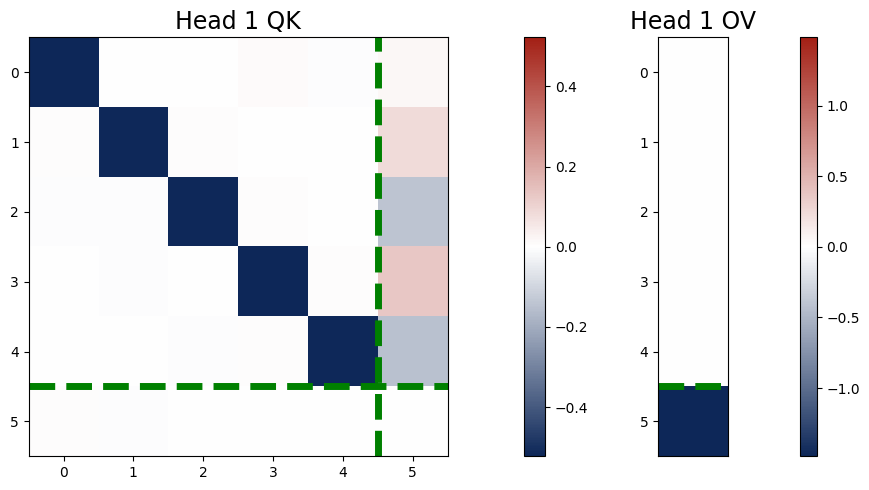

In [8]:
plot_attn_matrices(model_head_1, n_layers, d, n_head, adj_factor = [1,1], save=True)

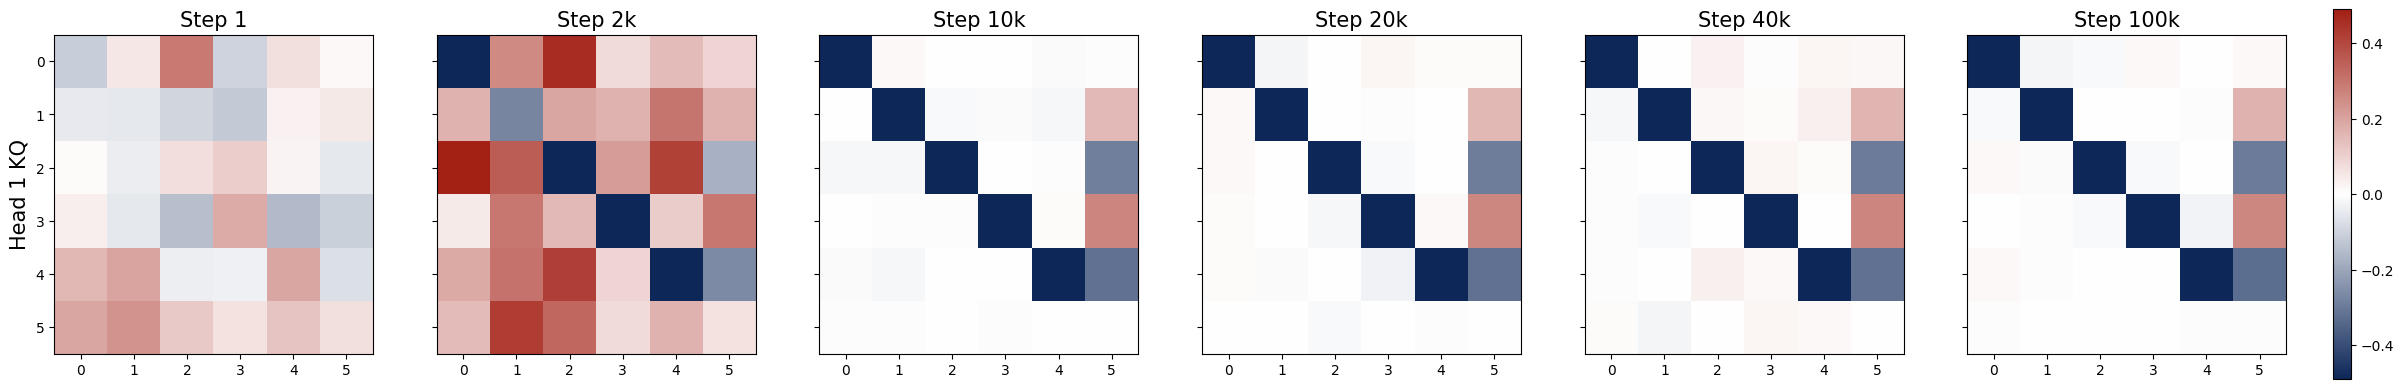

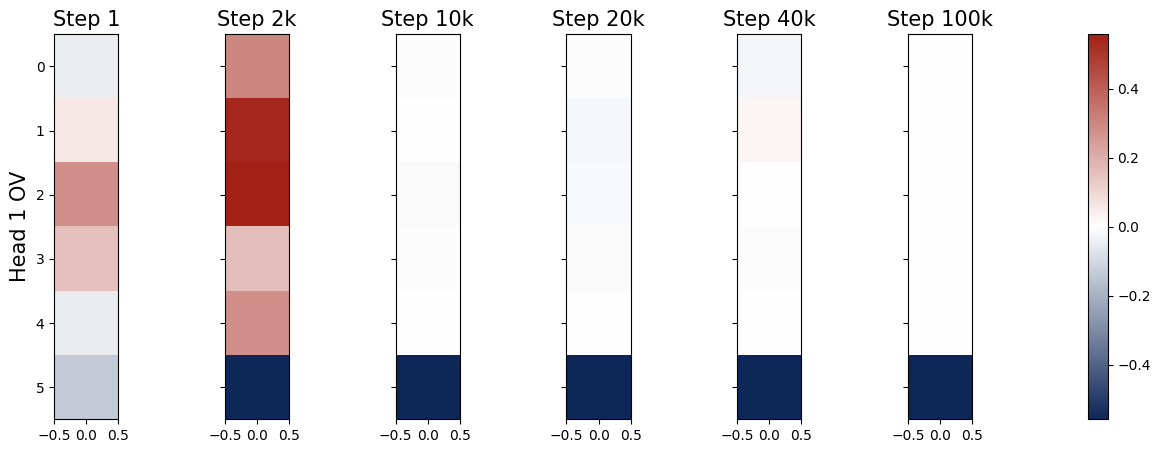

In [117]:
kq_mtrx_dynamic = model_head_1_load['qk_matrices']
ov_mtrx_dynamic = model_head_1_load['ov_matrices']

plot_heatmap_sequence_all_heads(kq_mtrx_dynamic, [0,1,5,10,20,50], 1000000, 1, True)
plot_heatmap_sequence_per_head(ov_mtrx_dynamic, [0,1,5,10,20,50], 1000000, 1, True)

In [4]:
# Load the .pth file
n_layers, d, n_head = 1,5,2
model_path = "saved_models/Layer_1_Head_2_d_5_trained_model.pth"
model_head_2_load = torch.load(model_path, map_location=torch.device(device), weights_only=True)
model_head_2 = model_head_2_load['model']

print(f"Keys of Saved Data: {model_head_2_load.keys()}")
print(f"Keys of Saved Model: {model_head_2_load['model'].keys()}")

Keys of Saved Data: dict_keys(['final_loss', 'training_losses', 'validation_losses', 'qk_dynamics', 'ov_dynamics', 'qk_matrices', 'ov_matrices', 'model'])
Keys of Saved Model: odict_keys(['attention_layer.q_proj.weight', 'attention_layer.k_proj.weight', 'attention_layer.v_proj.weight', 'attention_layer.o_proj.weight'])


### Plot the Attention Matrix of Trained Model

[[-1.2677839e-01  3.5695839e-04  2.0324576e-03 -4.4044149e-03
   1.0575125e-03  4.4550031e-02]
 [ 8.1994367e-04 -1.2308061e-01 -1.2586612e-03  1.0861859e-03
  -2.7880722e-04 -1.6665699e-02]
 [ 3.5598399e-03 -1.3896514e-04 -1.2809841e-01  7.8721135e-04
   7.3370997e-05 -1.3930496e-02]
 [-2.3345188e-03 -6.6909363e-04 -3.4487937e-03 -1.2841243e-01
   1.8674346e-03  6.4128883e-02]
 [-1.3143090e-03  1.4170039e-03 -5.1621243e-04 -3.0404155e-03
  -1.2618817e-01  4.5405354e-02]
 [-1.5230285e-03  4.1082283e-04 -1.1328679e-03  9.8961394e-04
  -3.0532086e-04  1.6210701e-05]]


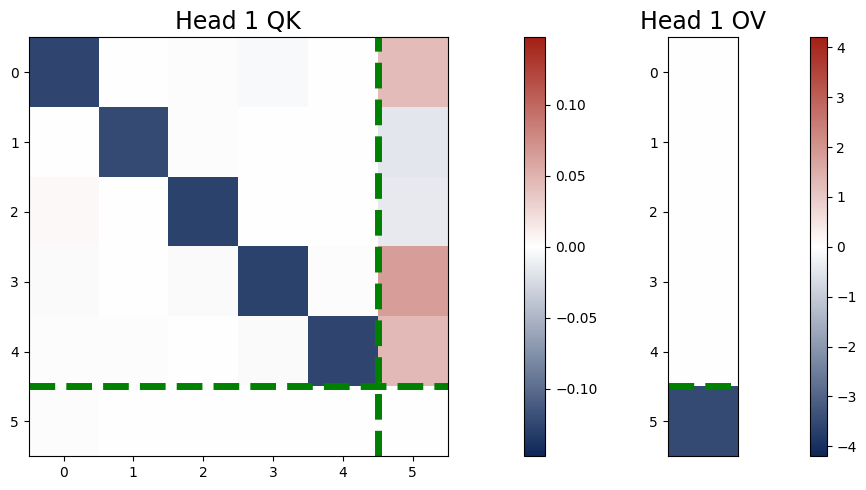

[[ 1.2395741e-01 -6.8598386e-04 -2.0344167e-03 -4.2779949e-03
  -1.1713289e-03 -5.0847188e-02]
 [ 2.9537235e-03  1.2776686e-01 -8.6493499e-04  8.3373475e-04
  -2.3101818e-05 -6.7637786e-02]
 [ 1.1950390e-03  2.9033113e-03  1.2375302e-01  7.3887000e-04
  -1.7781510e-03  8.9738950e-02]
 [ 4.2909768e-04 -1.8292707e-03 -6.4386358e-04  1.3002886e-01
   4.5310354e-04  6.3341722e-02]
 [-3.5589197e-04  2.5821861e-03 -1.7988136e-03 -2.5500462e-03
   1.2325345e-01  5.3418953e-02]
 [-7.4102194e-04 -7.7757846e-05 -1.3270404e-03  7.2323112e-04
  -5.4226891e-04 -4.8378235e-04]]


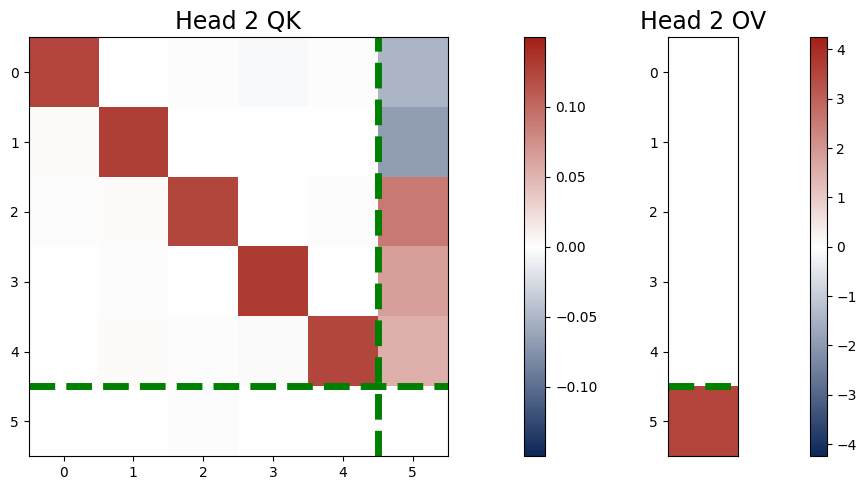

In [5]:
plot_attn_matrices(model_head_2, n_layers, d, n_head, [1.15,1.2], save=True)

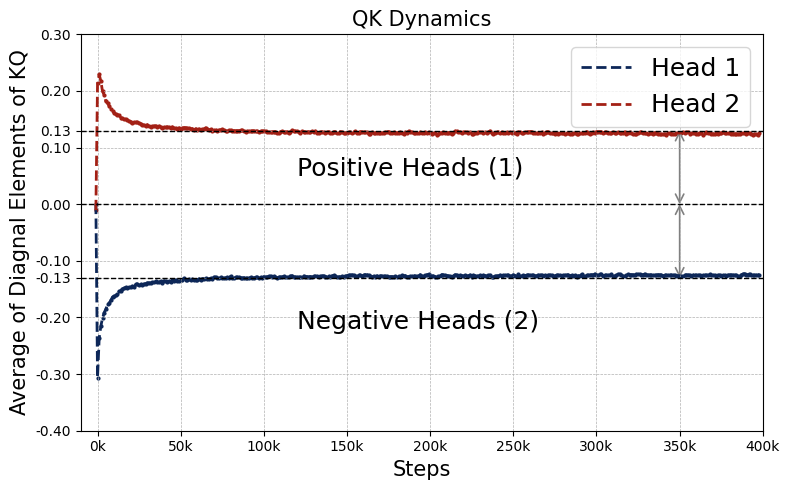

In [6]:
colors= ['#0D2758','#A32015', "#60656F", "#DEA54B"]

# Create the figure
plt.figure(figsize=(8, 5))

for idx, dynamics_list in enumerate(model_head_2_load['qk_dynamics']):
    # Convert to NumPy array
    data = [x.cpu().detach().numpy() if isinstance(x, torch.Tensor) else x for x in dynamics_list][:400]
    x = [(i-1) * 400000 / len(data)  for i in range(len(data))]
    
    # Plot the points (small markers) and lines
    plt.plot(x, data, color=colors[idx], linestyle='--', linewidth=2, label=f'Head {idx + 1}')
    plt.scatter(x, data, color=colors[idx], s=4, marker='o')  # Smaller points
    
# Add horizontal reference line
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0.13, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-0.13, color='black', linestyle='--', linewidth=1)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(350000, 0.135),  # Start position (x, y)
    posB=(350000, -0.005),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(350000, -0.135),  # Start position (x, y)
    posB=(350000, 0.005),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Customize x-axis ticks
xticks = np.linspace(0, 400000, num=9)  # Generate ticks (e.g., 0, 100000, 200000, ...)
plt.xticks(ticks=xticks, labels=[f'{int(tick/1000)}k' for tick in xticks])

# Customize y-axis ticks
yticks = plt.yticks()[0]
plt.yticks(ticks=np.append(yticks, [0.13, -0.13]), labels=[f'{tick:.2f}' if tick in [0.13, -0.13] else f'{tick:.2f}' for tick in np.append(yticks, [0.13, -0.13])])

plt.text(120000, 0.05, "Positive Heads (1)", fontsize=18, color="black")
#plt.text(180000, 0.03, "Dummy Heads (3)", fontsize=15, color="black")
plt.text(120000, -0.22, "Negative Heads (2)", fontsize=18, color="black")

# Add labels, title, and legend
plt.xlim(-10000, 400000)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Average of Diagnal Elements of KQ', fontsize=15)
plt.title('QK Dynamics', fontsize=15)
plt.legend(fontsize=18, loc ="upper right")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Layer_{n_layers}_Head_{n_head}_d_{d}_kq_dynamic.pdf", format="pdf", bbox_inches="tight")
plt.show()

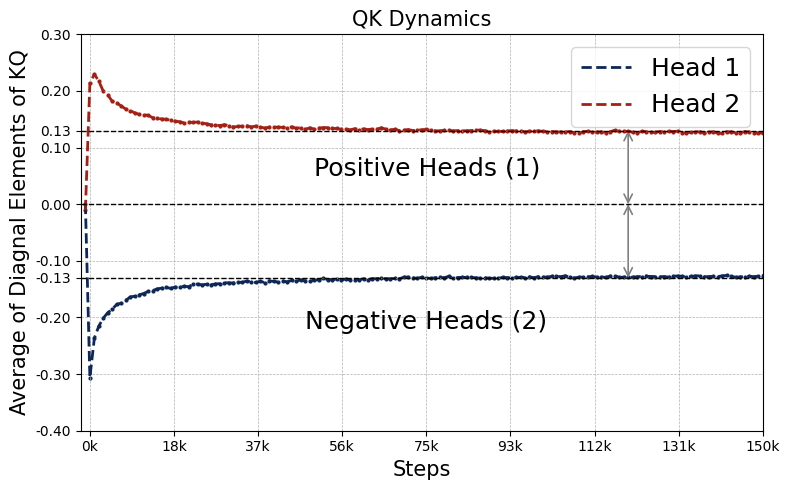

In [44]:
colors= ['#0D2758','#A32015', "#60656F", "#DEA54B"]

# Create the figure
plt.figure(figsize=(8, 5))

for idx, dynamics_list in enumerate(model_head_2_load['qk_dynamics']):
    # Convert to NumPy array
    data = [x.cpu().detach().numpy() if isinstance(x, torch.Tensor) else x for x in dynamics_list][:200]
    x = [(i-1) * 200000 / len(data)  for i in range(len(data))]
    
    # Plot the points (small markers) and lines
    plt.plot(x, data, color=colors[idx], linestyle='--', linewidth=2, label=f'Head {idx + 1}')
    plt.scatter(x, data, color=colors[idx], s=4, marker='o')  # Smaller points

# Add horizontal reference line
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0.13, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-0.13, color='black', linestyle='--', linewidth=1)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(120000, 0.135),  # Start position (x, y)
    posB=(120000, -0.005),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(120000, -0.135),  # Start position (x, y)
    posB=(120000, 0.005),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Customize x-axis ticks
xticks = np.linspace(0, 150000, num=9)  # Generate ticks (e.g., 0, 100000, 200000, ...)
plt.xticks(ticks=xticks, labels=[f'{int(tick/1000)}k' for tick in xticks])

# Customize y-axis ticks
yticks = plt.yticks()[0]
plt.yticks(ticks=np.append(yticks, [0.13, -0.13]), labels=[f'{tick:.2f}' if tick in [0.13, -0.13] else f'{tick:.2f}' for tick in np.append(yticks, [0.13, -0.13])])

plt.text(50000, 0.05, "Positive Heads (1)", fontsize=18, color="black")
#plt.text(180000, 0.03, "Dummy Heads (3)", fontsize=15, color="black")
plt.text(48000, -0.22, "Negative Heads (2)", fontsize=18, color="black")

# Add labels, title, and legend
plt.xlim(-2000, 150000)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Average of Diagnal Elements of KQ', fontsize=15)
plt.title('QK Dynamics', fontsize=15)
plt.legend(fontsize=18, loc ="upper right")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Layer_{n_layers}_Head_{n_head}_d_{d}_kq_dynamic_main.pdf", format="pdf", bbox_inches="tight")
plt.show()

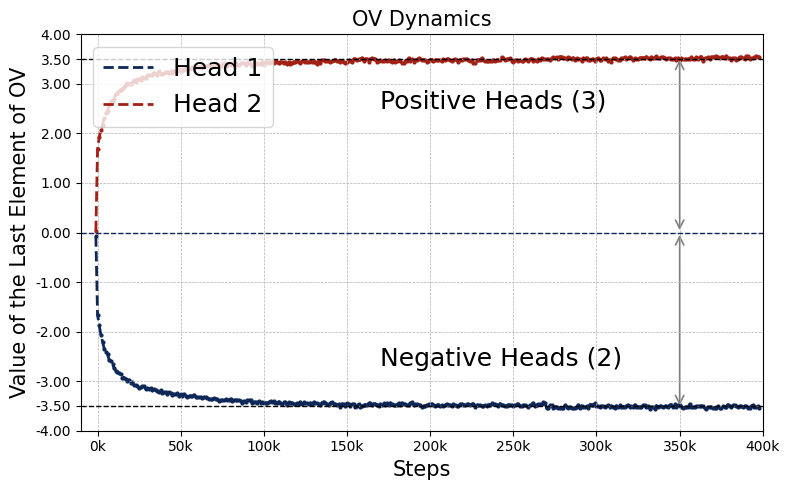

In [45]:
# Create the figure
plt.figure(figsize=(8, 5))
sum_negative = []

for idx, dynamics_list in enumerate(model_head_2_load['ov_dynamics']):
    # Convert to NumPy array
    data = [x.cpu().detach().numpy() if isinstance(x, torch.Tensor) else x for x in dynamics_list][:400]
    x = [(i-1) * 400000 / len(data) for i in range(len(data))]
    #if idx == 0 or idx ==3:
    #    sum_negative.append(data)
    
    # Plot the points (small markers) and lines
    plt.plot(x, data, color=colors[idx], linestyle='--', linewidth=2, label=f'Head {idx + 1}')
    plt.scatter(x, data, color=colors[idx], s=4, marker='o')  # Smaller points

#sum_negative = [sum_negative[0][i] + sum_negative[1][i] for i in range(len(sum_negative[0]))]
#plt.plot(x, sum_negative, color="#AD8A64", linestyle=':', linewidth=2, label=f'Sum of Head 1&4')
#plt.scatter(x, sum_negative, color="#AD8A64", s=4, marker='o')  # Smaller points
    
# Add horizontal reference line
plt.axhline(y=0, color='#0D2758', linestyle='--', linewidth=1)
plt.axhline(y=3.5, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-3.5, color='black', linestyle='--', linewidth=1)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(350000, 3.55),  # Start position (x, y)
    posB=(350000, -0.01),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(350000, -3.55),  # Start position (x, y)
    posB=(350000, 0.01),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

plt.text(170000, 2.5, "Positive Heads (3)", fontsize=18, color="black")
#plt.text(180000, 0.3, "Dummy Heads (1)", fontsize=15, color="black")
plt.text(170000, -2.7, "Negative Heads (2)", fontsize=18, color="black")

xticks = np.linspace(0, 400000, num=9)  # Generate ticks (e.g., 0, 100000, 200000, ...)
plt.xticks(ticks=xticks, labels=[f'{int(tick/1000)}k' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(ticks=np.append(yticks, [3.5, -3.5]), labels=[f'{tick:.2f}' if tick in [3.5, -3.5] else f'{tick:.2f}' for tick in np.append(yticks, [3.5, -3.5])])
# Add labels, title, and legend
plt.xlim(-10000, 400000)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Value of the Last Element of OV', fontsize=15)
plt.title('OV Dynamics', fontsize=15)
plt.legend(fontsize=18, loc ="upper left")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Layer_{n_layers}_Head_{n_head}_d_{d}_ov_dynamic.pdf", format="pdf", bbox_inches="tight")
plt.show()

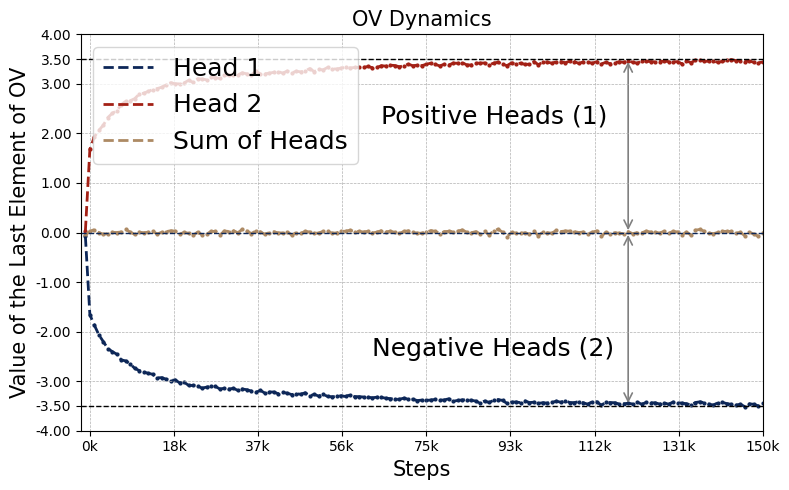

In [49]:
# Create the figure
plt.figure(figsize=(8, 5))
sum_negative = []

for idx, dynamics_list in enumerate(model_head_2_load['ov_dynamics']):
    # Convert to NumPy array
    data = [x.cpu().detach().numpy() if isinstance(x, torch.Tensor) else x for x in dynamics_list][:400]
    x = [(i-1) * 400000 / len(data) for i in range(len(data))]
    if idx == 0 or idx ==1:
        sum_negative.append(data)
    
    # Plot the points (small markers) and lines
    plt.plot(x, data, color=colors[idx], linestyle='--', linewidth=2, label=f'Head {idx + 1}')
    plt.scatter(x, data, color=colors[idx], s=4, marker='o')  # Smaller points

sum_negative = [sum_negative[0][i] + sum_negative[1][i] for i in range(len(sum_negative[0]))]
plt.plot(x, sum_negative, color="#AD8A64", linestyle='--', linewidth=2, label=f'Sum of Heads')
plt.scatter(x, sum_negative, color="#AD8A64", s=4, marker='o')  # Smaller points
    
# Add horizontal reference line
plt.axhline(y=0, color='#0D2758', linestyle='--', linewidth=1)
plt.axhline(y=3.5, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-3.5, color='black', linestyle='--', linewidth=1)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(120000, 3.5),  # Start position (x, y)
    posB=(120000, -0.01),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(120000, -3.5),  # Start position (x, y)
    posB=(120000, 0.01),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

plt.text(65000, 2.2, "Positive Heads (1)", fontsize=18, color="black")
#plt.text(180000, 0.03, "Dummy Heads (3)", fontsize=15, color="black")
plt.text(63000, -2.5, "Negative Heads (2)", fontsize=18, color="black")

xticks = np.linspace(0, 150000, num=9)  # Generate ticks (e.g., 0, 100000, 200000, ...)
plt.xticks(ticks=xticks, labels=[f'{int(tick/1000)}k' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(ticks=np.append(yticks, [3.5, -3.5]), labels=[f'{tick:.2f}' if tick in [3.5, -3.5] else f'{tick:.2f}' for tick in np.append(yticks, [3.5, -3.5])])

# Add labels, title, and legend
plt.xlim(-2000, 150000)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Value of the Last Element of OV', fontsize=15)
plt.title('OV Dynamics', fontsize=15)
plt.legend(fontsize=18, loc ="upper left")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Layer_{n_layers}_Head_{n_head}_d_{d}_ov_dynamic_main.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [110]:
len(kq_mtrx_dynamic[0])

501

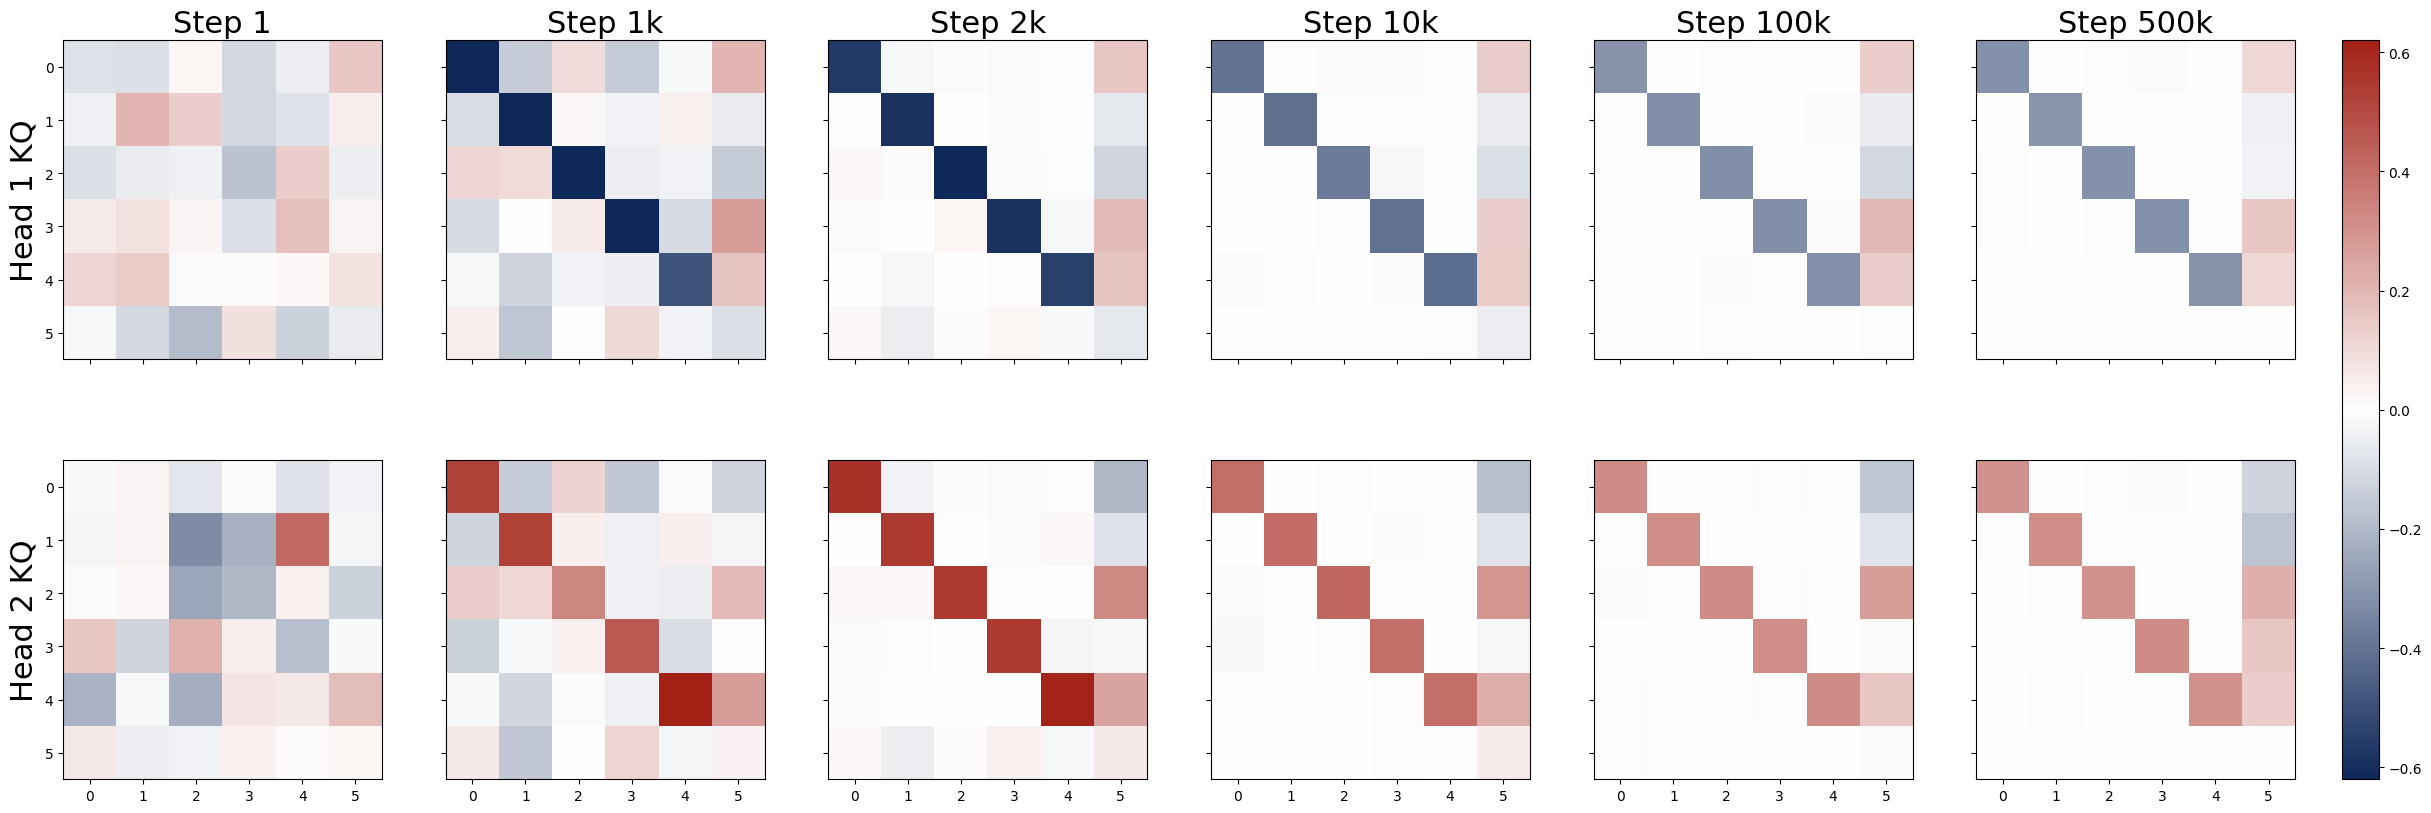

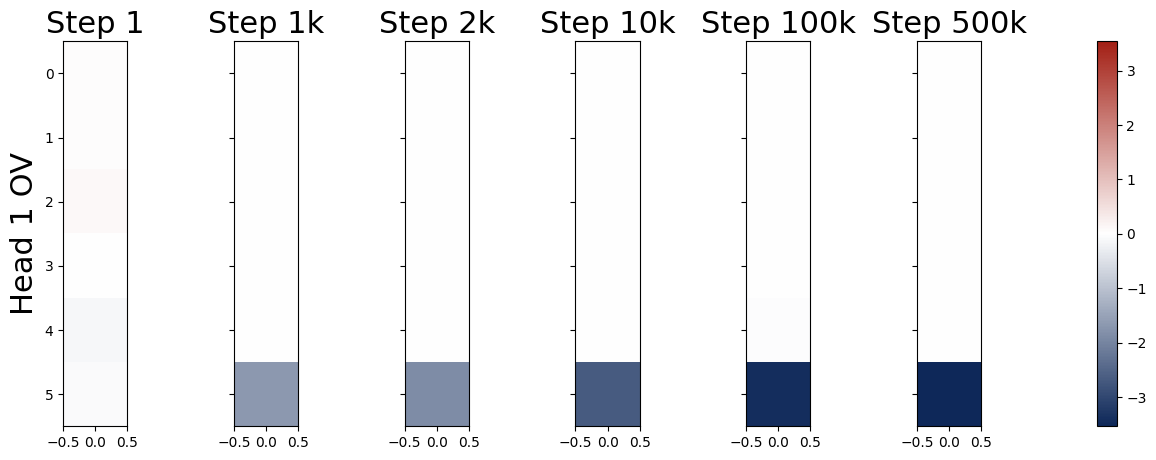

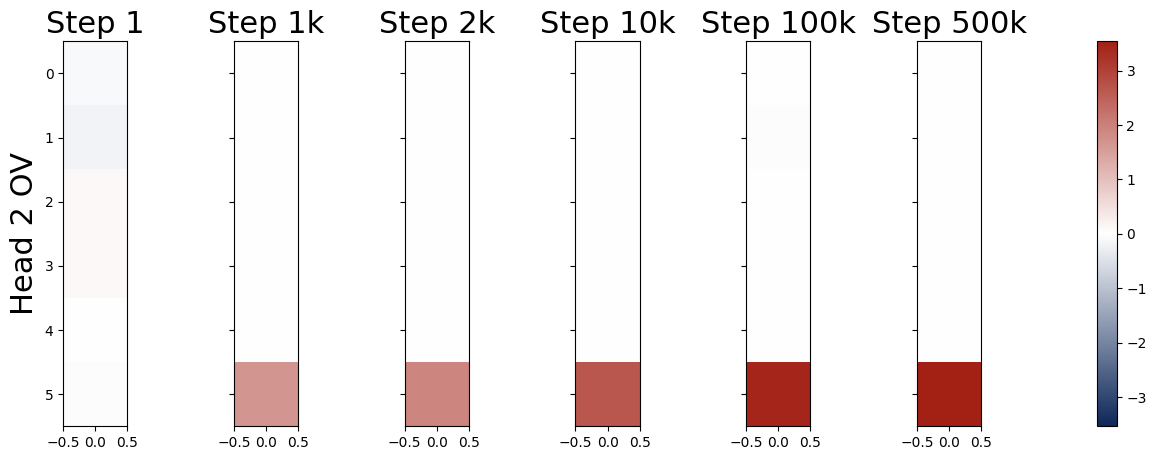

In [13]:
kq_mtrx_dynamic = model_head_2_load['qk_matrices']
ov_mtrx_dynamic = model_head_2_load['ov_matrices']

plot_heatmap_sequence_all_heads(kq_mtrx_dynamic, [0,1,2,10,100,500], 500000, 0.8, True)
plot_heatmap_sequence_per_head(ov_mtrx_dynamic, [0,1,2,10,100,500], 500000, 1, True)

In [50]:
# Load the .pth file
n_layers, d, n_head = 1,5,3
model_path = "saved_models/Layer_1_Head_3_d_5_trained_model.pth"
model_head_3_load = torch.load(model_path, map_location=torch.device(device), weights_only=True)
model_head_3 = model_head_3_load['model']

print(f"Keys of Saved Data: {model_head_3_load.keys()}")
print(f"Keys of Saved Model: {model_head_3_load['model'].keys()}")

Keys of Saved Data: dict_keys(['final_loss', 'training_losses', 'validation_losses', 'qk_dynamics', 'ov_dynamics', 'qk_matrices', 'ov_matrices', 'model'])
Keys of Saved Model: odict_keys(['attention_layer.q_proj.weight', 'attention_layer.k_proj.weight', 'attention_layer.v_proj.weight', 'attention_layer.o_proj.weight'])


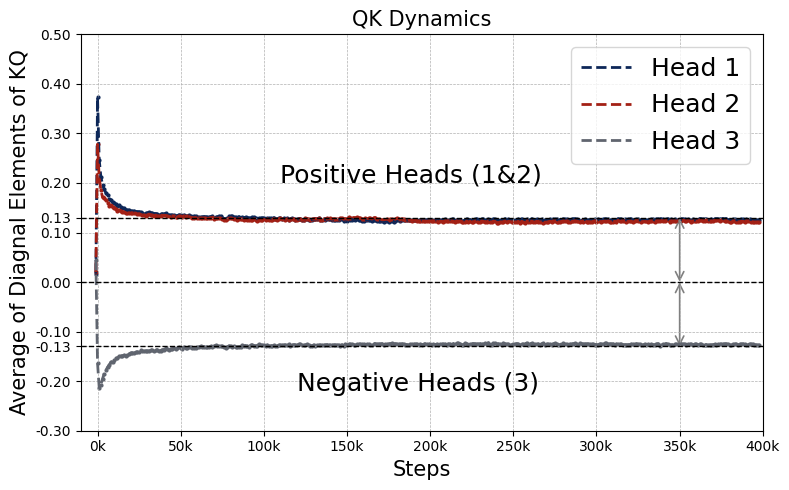

In [51]:
colors= ['#0D2758','#A32015', "#60656F", "#DEA54B"]

# Create the figure
plt.figure(figsize=(8, 5))

for idx, dynamics_list in enumerate(model_head_3_load['qk_dynamics']):
    # Convert to NumPy array
    data = [x.cpu().detach().numpy() if isinstance(x, torch.Tensor) else x for x in dynamics_list][:400]
    x = [(i-1) * 400000 / len(data)  for i in range(len(data))]
    
    # Plot the points (small markers) and lines
    plt.plot(x, data, color=colors[idx], linestyle='--', linewidth=2, label=f'Head {idx + 1}')
    plt.scatter(x, data, color=colors[idx], s=4, marker='o')  # Smaller points
    
# Add horizontal reference line
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0.13, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-0.13, color='black', linestyle='--', linewidth=1)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(350000, 0.135),  # Start position (x, y)
    posB=(350000, -0.005),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(350000, -0.135),  # Start position (x, y)
    posB=(350000, 0.005),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Customize x-axis ticks
xticks = np.linspace(0, 400000, num=9)  # Generate ticks (e.g., 0, 100000, 200000, ...)
plt.xticks(ticks=xticks, labels=[f'{int(tick/1000)}k' for tick in xticks])

# Customize y-axis ticks
yticks = plt.yticks()[0]
plt.yticks(ticks=np.append(yticks, [0.13, -0.13]), labels=[f'{tick:.2f}' if tick in [0.13, -0.13] else f'{tick:.2f}' for tick in np.append(yticks, [0.13, -0.13])])

plt.text(110000, 0.2, "Positive Heads (1&2)", fontsize=18, color="black")
#plt.text(180000, 0.03, "Dummy Heads (3)", fontsize=15, color="black")
plt.text(120000, -0.22, "Negative Heads (3)", fontsize=18, color="black")

# Add labels, title, and legend
plt.xlim(-10000, 400000)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Average of Diagnal Elements of KQ', fontsize=15)
plt.title('QK Dynamics', fontsize=15)
plt.legend(fontsize=18, loc ="upper right")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Layer_{n_layers}_Head_{n_head}_d_{d}_kq_dynamic.pdf", format="pdf", bbox_inches="tight")
plt.show()

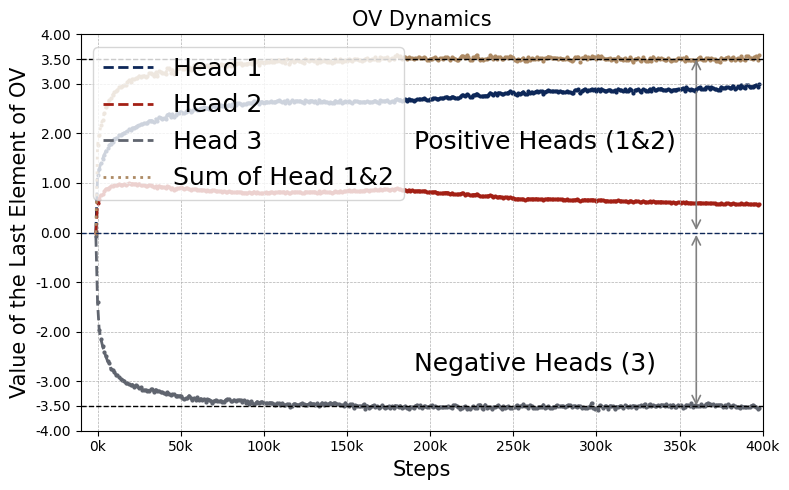

In [52]:
# Create the figure
plt.figure(figsize=(8, 5))
sum_negative = []

for idx, dynamics_list in enumerate(model_head_3_load['ov_dynamics']):
    # Convert to NumPy array
    data = [x.cpu().detach().numpy() if isinstance(x, torch.Tensor) else x for x in dynamics_list][:400]
    x = [(i-1) * 400000 / len(data) for i in range(len(data))]
    if idx == 0 or idx ==1:
        sum_negative.append(data)
    
    # Plot the points (small markers) and lines
    plt.plot(x, data, color=colors[idx], linestyle='--', linewidth=2, label=f'Head {idx + 1}')
    plt.scatter(x, data, color=colors[idx], s=4, marker='o')  # Smaller points

sum_negative = [sum_negative[0][i] + sum_negative[1][i] for i in range(len(sum_negative[0]))]
plt.plot(x, sum_negative, color="#AD8A64", linestyle=':', linewidth=2, label=f'Sum of Head 1&2')
plt.scatter(x, sum_negative, color="#AD8A64", s=4, marker='o')  # Smaller points
    
# Add horizontal reference line
plt.axhline(y=0, color='#0D2758', linestyle='--', linewidth=1)
plt.axhline(y=3.5, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-3.5, color='black', linestyle='--', linewidth=1)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(360000, 3.55),  # Start position (x, y)
    posB=(360000, -0.01),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(360000, -3.55),  # Start position (x, y)
    posB=(360000, 0.01),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

plt.text(190000, 1.7, "Positive Heads (1&2)", fontsize=18, color="black")
#plt.text(180000, 0.3, "Dummy Heads (1)", fontsize=15, color="black")
plt.text(190000, -2.8, "Negative Heads (3)", fontsize=18, color="black")

xticks = np.linspace(0, 400000, num=9)  # Generate ticks (e.g., 0, 100000, 200000, ...)
plt.xticks(ticks=xticks, labels=[f'{int(tick/1000)}k' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(ticks=np.append(yticks, [3.5, -3.5]), labels=[f'{tick:.2f}' if tick in [3.5, -3.5] else f'{tick:.2f}' for tick in np.append(yticks, [3.5, -3.5])])
# Add labels, title, and legend
plt.xlim(-10000, 400000)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Value of the Last Element of OV', fontsize=15)
plt.title('OV Dynamics', fontsize=15)
plt.legend(fontsize=18, loc ="upper left")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Layer_{n_layers}_Head_{n_head}_d_{d}_ov_dynamic.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Plot the Dynamic of KQ matrix along the Training Epochs

In [ ]:
kq_mtrx_dynamic = model_head_4_load['qk_matrices']
ov_mtrx_dynamic = model_head_4_load['ov_matrices']

plot_heatmap_sequence_all_heads(kq_mtrx_dynamic, [0,1,5,10,100,1000], 1000000, 0.48, True)
plot_heatmap_sequence_per_head(ov_mtrx_dynamic, [0,1,5,10,100,1000], 1000000, 1, True)

In [46]:
n_layers, d, n_head = 1,5,4

# Load the .pth file
model_path = "saved_models/Layer_1_Head_4_d_5_trained_model.pth"
model_head_4_load = torch.load(model_path, map_location=torch.device(device), weights_only=True)

print(f"Keys of Saved Data: {model_head_4_load.keys()}")
print(f"Length of Recorded Dynamics: {len(model_head_4_load['qk_dynamics'][0])}")

Keys of Saved Data: dict_keys(['final_loss', 'training_losses', 'validation_losses', 'qk_dynamics', 'ov_dynamics', 'qk_matrices', 'ov_matrices', 'model'])
Length of Recorded Dynamics: 501


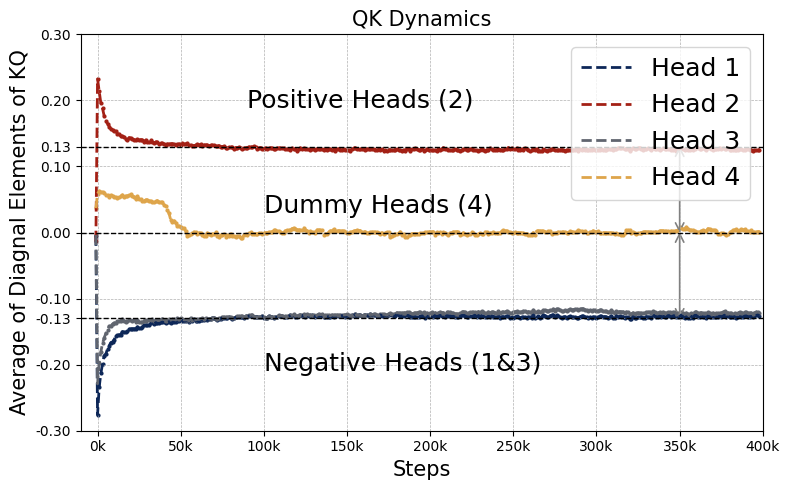

In [48]:
colors= ['#0D2758','#A32015', "#60656F", "#DEA54B"]

# Create the figure
plt.figure(figsize=(8, 5))

for idx, dynamics_list in enumerate(model_head_4_load['qk_dynamics']):
    # Convert to NumPy array
    data = [x.cpu().detach().numpy() if isinstance(x, torch.Tensor) else x for x in dynamics_list][:400]
    x = [(i-1) * 400000 / len(data)  for i in range(len(data))]
    
    # Plot the points (small markers) and lines
    plt.plot(x, data, color=colors[idx], linestyle='--', linewidth=2, label=f'Head {idx + 1}')
    plt.scatter(x, data, color=colors[idx], s=4, marker='o')  # Smaller points
    
# Add horizontal reference line
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0.13, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-0.13, color='black', linestyle='--', linewidth=1)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(350000, 0.135),  # Start position (x, y)
    posB=(350000, -0.005),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(350000, -0.135),  # Start position (x, y)
    posB=(350000, 0.005),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Customize x-axis ticks
xticks = np.linspace(0, 400000, num=9)  # Generate ticks (e.g., 0, 100000, 200000, ...)
plt.xticks(ticks=xticks, labels=[f'{int(tick/1000)}k' for tick in xticks])

# Customize y-axis ticks
yticks = plt.yticks()[0]
plt.yticks(ticks=np.append(yticks, [0.13, -0.13]), labels=[f'{tick:.2f}' if tick in [0.13, -0.13] else f'{tick:.2f}' for tick in np.append(yticks, [0.13, -0.13])])

plt.text(90000, 0.19, "Positive Heads (2)", fontsize=18, color="black")
plt.text(100000, 0.03, "Dummy Heads (4)", fontsize=18, color="black")
plt.text(100000, -0.21, "Negative Heads (1&3)", fontsize=18, color="black")

# Add labels, title, and legend
plt.xlim(-10000, 400000)
plt.ylim(-0.3,0.3)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Average of Diagnal Elements of KQ', fontsize=15)
plt.title('QK Dynamics', fontsize=15)
plt.legend(fontsize=18, loc ="upper right")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Layer_{n_layers}_Head_{n_head}_d_{d}_kq_dynamic.pdf", format="pdf", bbox_inches="tight")
plt.show()

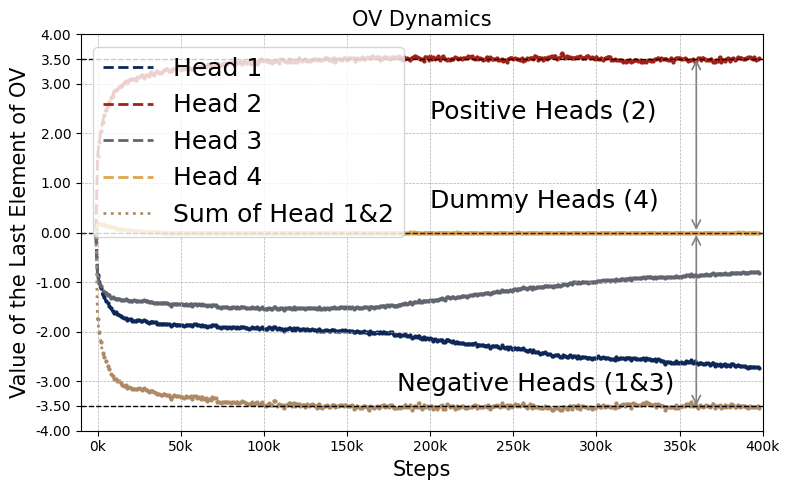

In [49]:
# Create the figure
plt.figure(figsize=(8, 5))
sum_negative = []

for idx, dynamics_list in enumerate(model_head_4_load['ov_dynamics']):
    # Convert to NumPy array
    data = [x.cpu().detach().numpy() if isinstance(x, torch.Tensor) else x for x in dynamics_list][:400]
    x = [(i-1) * 400000 / len(data) for i in range(len(data))]
    if idx == 0 or idx ==2:
        sum_negative.append(data)
    
    # Plot the points (small markers) and lines
    plt.plot(x, data, color=colors[idx], linestyle='--', linewidth=2, label=f'Head {idx + 1}')
    plt.scatter(x, data, color=colors[idx], s=4, marker='o')  # Smaller points

sum_negative = [sum_negative[0][i] + sum_negative[1][i] for i in range(len(sum_negative[0]))]
plt.plot(x, sum_negative, color="#AD8A64", linestyle=':', linewidth=2, label=f'Sum of Head 1&2')
plt.scatter(x, sum_negative, color="#AD8A64", s=4, marker='o')  # Smaller points
    
# Add horizontal reference line
plt.axhline(y=0, color='#0D2758', linestyle='--', linewidth=1)
plt.axhline(y=3.5, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-3.5, color='black', linestyle='--', linewidth=1)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(360000, 3.55),  # Start position (x, y)
    posB=(360000, -0.01),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(360000, -3.55),  # Start position (x, y)
    posB=(360000, 0.01),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

plt.text(200000, 2.3, "Positive Heads (2)", fontsize=18, color="black")
plt.text(200000, 0.5, "Dummy Heads (4)", fontsize=18, color="black")
plt.text(180000, -3.2, "Negative Heads (1&3)", fontsize=18, color="black")

xticks = np.linspace(0, 400000, num=9)  # Generate ticks (e.g., 0, 100000, 200000, ...)
plt.xticks(ticks=xticks, labels=[f'{int(tick/1000)}k' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(ticks=np.append(yticks, [3.5, -3.5]), labels=[f'{tick:.2f}' if tick in [3.5, -3.5] else f'{tick:.2f}' for tick in np.append(yticks, [3.5, -3.5])])
# Add labels, title, and legend
plt.xlim(-10000, 400000)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Value of the Last Element of OV', fontsize=15)
plt.title('OV Dynamics', fontsize=15)
plt.legend(fontsize=18, loc ="upper left")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Layer_{n_layers}_Head_{n_head}_d_{d}_ov_dynamic.pdf", format="pdf", bbox_inches="tight")
plt.show()

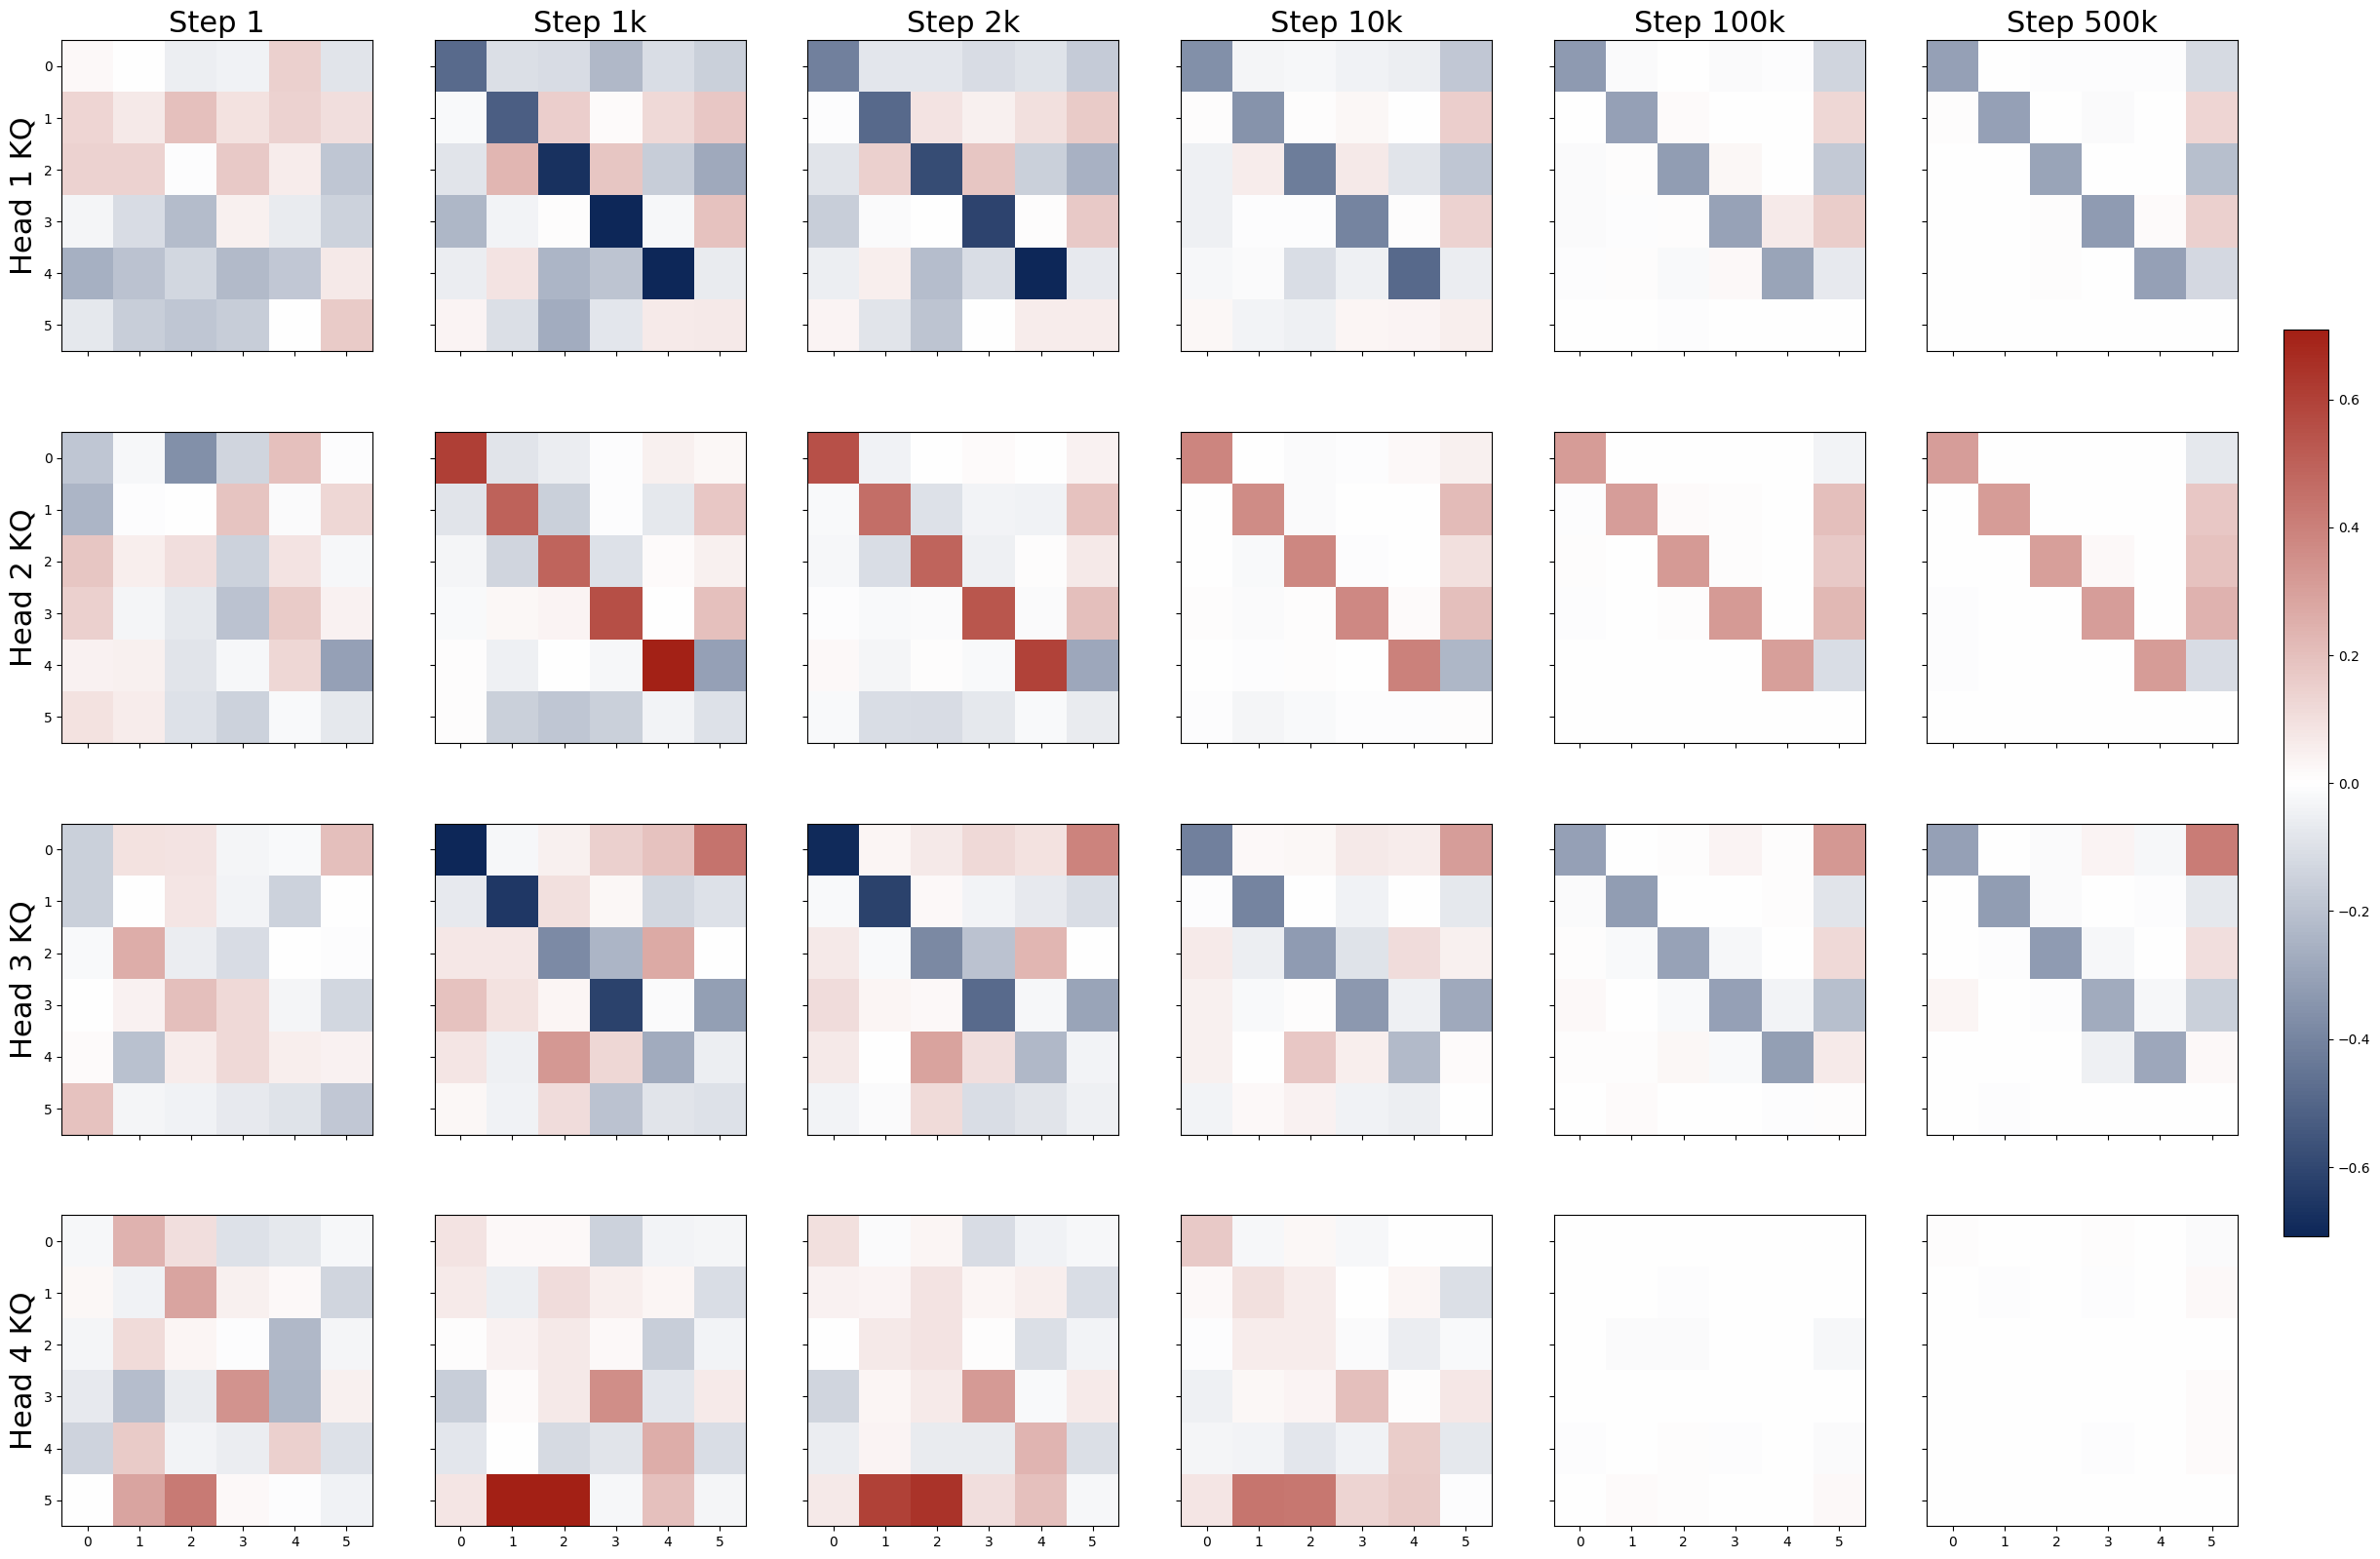

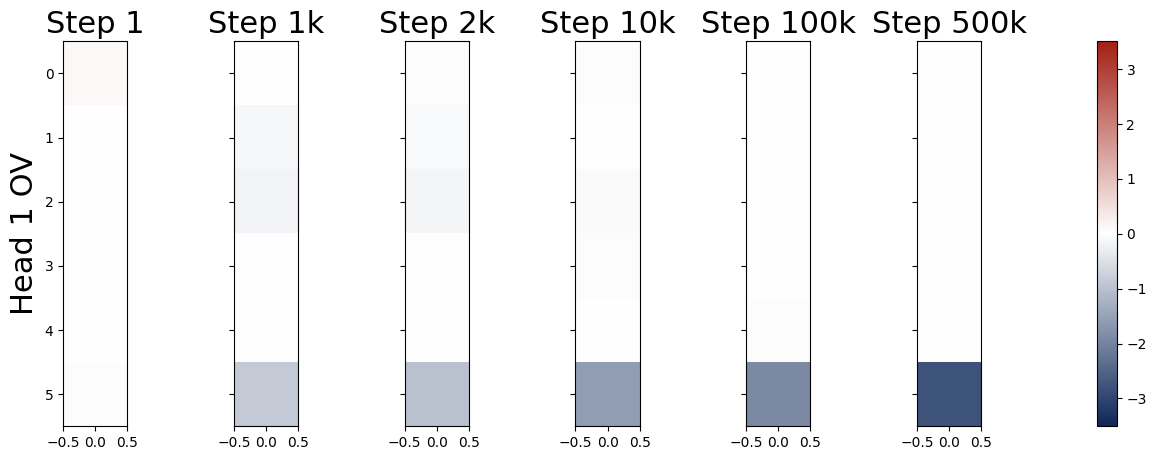

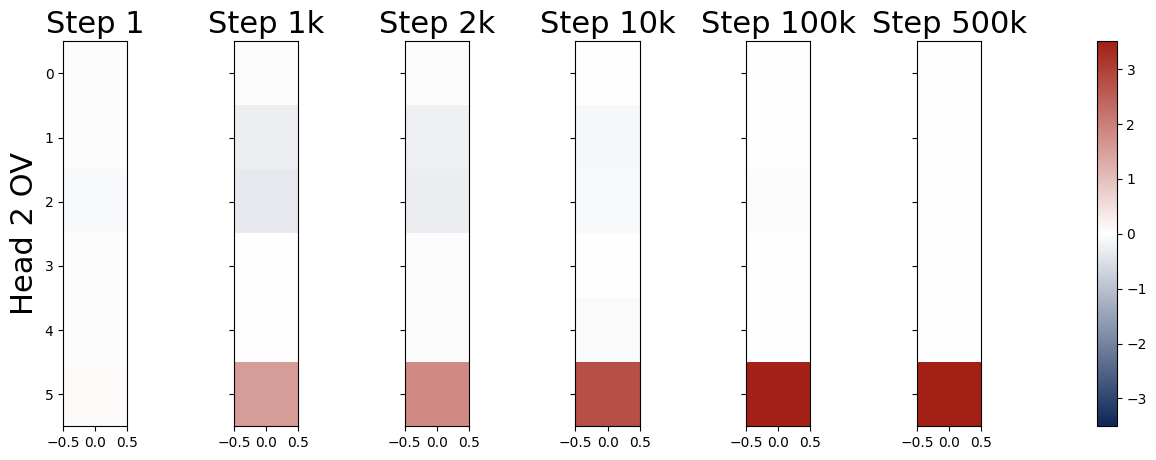

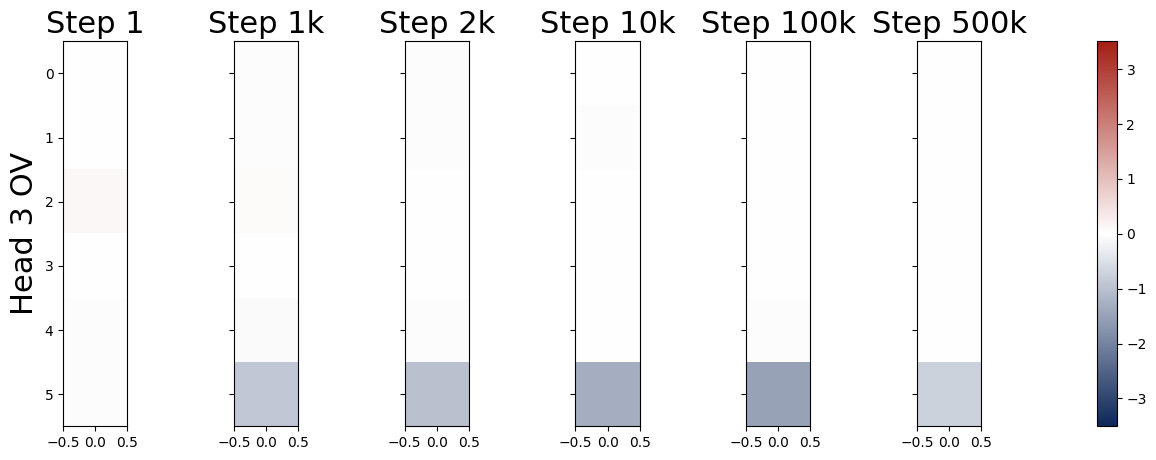

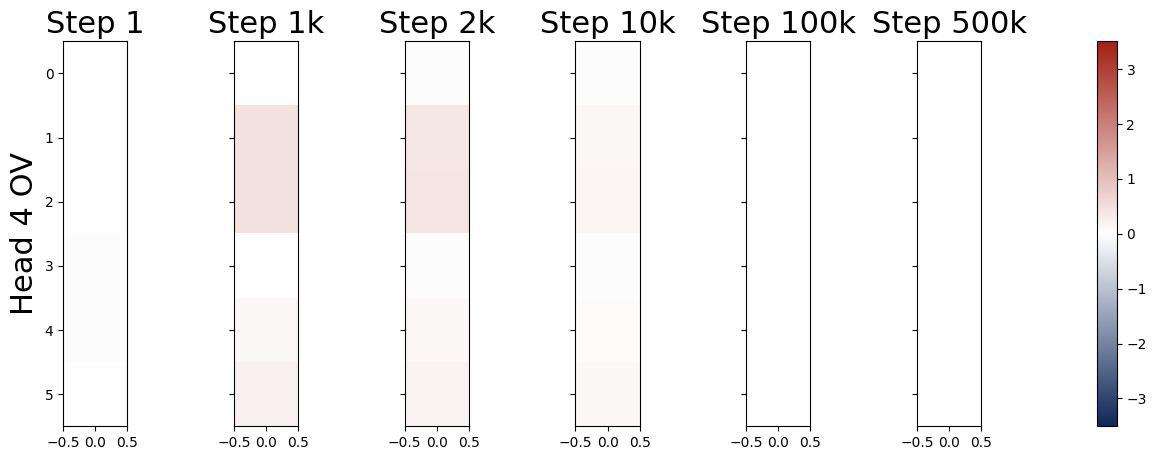

In [25]:
kq_mtrx_dynamic = model_head_4_load['qk_matrices']
ov_mtrx_dynamic = model_head_4_load['ov_matrices']

plot_heatmap_sequence_all_heads(kq_mtrx_dynamic, [0,1,2,10,100,500], 500000, 0.9, True)
plot_heatmap_sequence_per_head(ov_mtrx_dynamic, [0,1,2,10,100,500], 500000, 1, True)

In [2]:
n_layers, d, n_head = 1,5,4

# Load the .pth file
model_path = "saved_models/Layer_1_Head_4_d_5_trained_model.pth"#_0117.pth"
model_head_4_load = torch.load(model_path, map_location=torch.device(device), weights_only=True)

print(f"Keys of Saved Data: {model_head_4_load.keys()}")
print(f"Length of Recorded Dynamics: {len(model_head_4_load['qk_dynamics'][0])}")

Keys of Saved Data: dict_keys(['final_loss', 'training_losses', 'validation_losses', 'qk_dynamics', 'ov_dynamics', 'qk_matrices', 'ov_matrices', 'model'])
Length of Recorded Dynamics: 1001


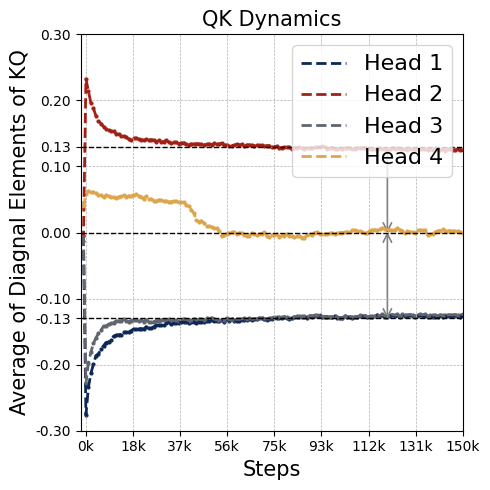

In [51]:
colors= ['#0D2758','#A32015', "#60656F", "#DEA54B"]

# Create the figure
plt.figure(figsize=(5, 5))

for idx, dynamics_list in enumerate(model_head_4_load['qk_dynamics']):
    # Convert to NumPy array
    data = [x.cpu().detach().numpy() if isinstance(x, torch.Tensor) else x for x in dynamics_list][:200]
    x = [(i-1) * 200000 / len(data)  for i in range(len(data))]
    
    # Plot the points (small markers) and lines
    plt.plot(x, data, color=colors[idx], linestyle='--', linewidth=2, label=f'Head {idx + 1}')
    plt.scatter(x, data, color=colors[idx], s=4, marker='o')  # Smaller points

# Add horizontal reference line
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0.13, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-0.13, color='black', linestyle='--', linewidth=1)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(120000, 0.135),  # Start position (x, y)
    posB=(120000, -0.005),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(120000, -0.135),  # Start position (x, y)
    posB=(120000, 0.005),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Customize x-axis ticks
xticks = np.linspace(0, 150000, num=9)  # Generate ticks (e.g., 0, 100000, 200000, ...)
plt.xticks(ticks=xticks, labels=[f'{int(tick/1000)}k' for tick in xticks])

# Customize y-axis ticks
yticks = plt.yticks()[0]
plt.yticks(ticks=np.append(yticks, [0.13, -0.13]), labels=[f'{tick:.2f}' if tick in [0.13, -0.13] else f'{tick:.2f}' for tick in np.append(yticks, [0.13, -0.13])])

#plt.text(50000, 0.05, "Positive Heads (1)", fontsize=18, color="black")
#plt.text(180000, 0.03, "Dummy Heads (3)", fontsize=15, color="black")
#plt.text(48000, -0.22, "Negative Heads (2)", fontsize=18, color="black")

# Add labels, title, and legend
plt.xlim(-2000, 150000)
plt.ylim(-0.3, 0.3)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Average of Diagnal Elements of KQ', fontsize=15)
plt.title('QK Dynamics', fontsize=15)
plt.legend(fontsize=16, loc ="upper right")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Layer_{n_layers}_Head_{n_head}_d_{d}_kq_dynamic_main.pdf", format="pdf", bbox_inches="tight")
plt.show()

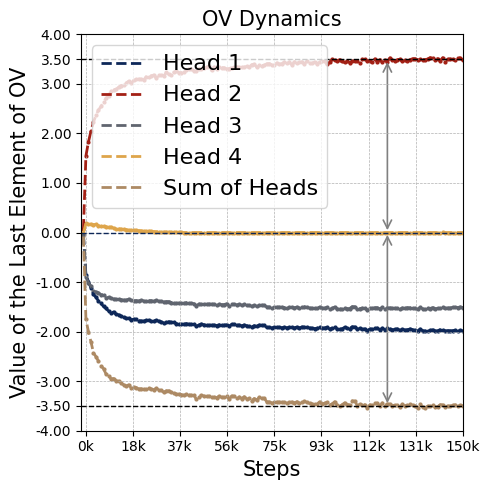

In [50]:
# Create the figure
plt.figure(figsize=(5, 5))
sum_negative = []

for idx, dynamics_list in enumerate(model_head_4_load['ov_dynamics']):
    # Convert to NumPy array
    data = [x.cpu().detach().numpy() if isinstance(x, torch.Tensor) else x for x in dynamics_list][:400]
    x = [(i-1) * 400000 / len(data) for i in range(len(data))]
    if idx == 0 or idx ==2:
        sum_negative.append(data)
    
    # Plot the points (small markers) and lines
    plt.plot(x, data, color=colors[idx], linestyle='--', linewidth=2, label=f'Head {idx + 1}')
    plt.scatter(x, data, color=colors[idx], s=4, marker='o')  # Smaller points

sum_negative = [sum_negative[0][i] + sum_negative[1][i] for i in range(len(sum_negative[0]))]
plt.plot(x, sum_negative, color="#AD8A64", linestyle='--', linewidth=2, label=f'Sum of Heads')
plt.scatter(x, sum_negative, color="#AD8A64", s=4, marker='o')  # Smaller points
    
# Add horizontal reference line
plt.axhline(y=0, color='#0D2758', linestyle='--', linewidth=1)
plt.axhline(y=3.5, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-3.5, color='black', linestyle='--', linewidth=1)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(120000, 3.5),  # Start position (x, y)
    posB=(120000, -0.01),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(120000, -3.5),  # Start position (x, y)
    posB=(120000, 0.01),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

#plt.text(65000, 2.2, "Positive Heads (1)", fontsize=18, color="black")
#plt.text(180000, 0.03, "Dummy Heads (3)", fontsize=15, color="black")
#plt.text(63000, -2.5, "Negative Heads (2)", fontsize=18, color="black")

xticks = np.linspace(0, 150000, num=9)  # Generate ticks (e.g., 0, 100000, 200000, ...)
plt.xticks(ticks=xticks, labels=[f'{int(tick/1000)}k' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(ticks=np.append(yticks, [3.5, -3.5]), labels=[f'{tick:.2f}' if tick in [3.5, -3.5] else f'{tick:.2f}' for tick in np.append(yticks, [3.5, -3.5])])

# Add labels, title, and legend
plt.xlim(-2000, 150000)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Value of the Last Element of OV', fontsize=15)
plt.title('OV Dynamics', fontsize=15)
plt.legend(fontsize=16, loc ="upper left")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Layer_{n_layers}_Head_{n_head}_d_{d}_ov_dynamic_main.pdf", format="pdf", bbox_inches="tight")
plt.show()

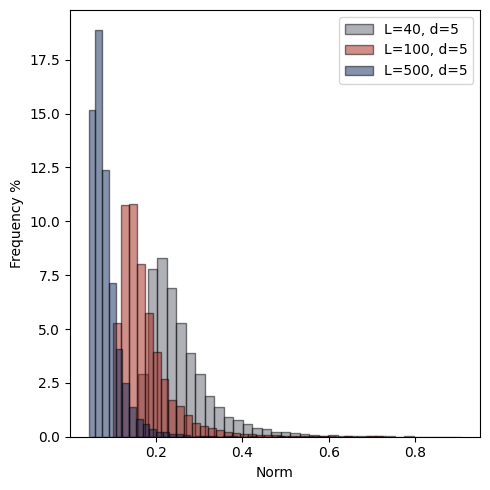

In [ ]:
pairs = [(40, 5),(100, 5),(500, 5)]  # List of (L, d) pairs
n = 10000  # Number of repetitions
scale = 0.5  # Scale for the dot product
colors= ['#0D2758','#A32015', "#60656F"]

plt.figure(figsize=(5, 5))
for i in range(len(pairs)):
    L, d = pairs[i]
    norms = plot_norm_histogram(L, d, n, scale)
    plt.hist(norms, bins=34, alpha=0.5, label=f"L={L}, d={d}", 
             color=colors[2 - i], edgecolor='black', density=True)  
plt.xlabel("Norm")
plt.ylabel("Frequency %")
plt.legend()
plt.tight_layout()

# Save the plot as a PDF and display it
plt.savefig("Intuition_approx_1.pdf", format="pdf", bbox_inches="tight")
plt.show()

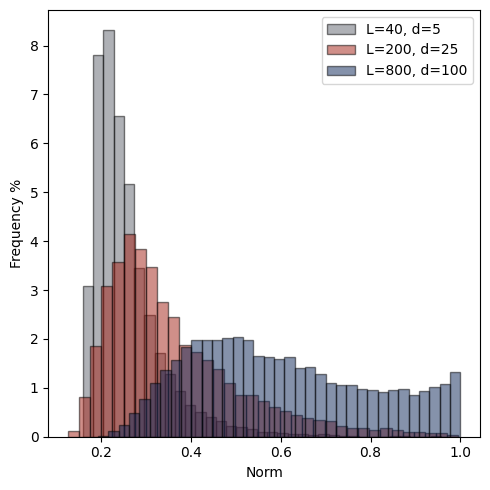

In [ ]:
pairs = [(40, 5),(200, 25),(800, 100)] # List of (L, d) pairs
n = 10000  # Number of repetitions
scale = 0.5  # Scale for the dot product

plt.figure(figsize=(5, 5))
for i in range(len(pairs)):
    L, d = pairs[i]
    norms = plot_norm_histogram(L, d, n, scale)
    plt.hist(norms, bins=35, alpha=0.5, label=f"L={L}, d={d}", 
             color=colors[2 - i], edgecolor='black', density=True)  
plt.xlabel("Norm")
plt.ylabel("Frequency %")
plt.legend()
plt.tight_layout()

# Save the plot as a PDF and display it
plt.savefig("Intuition_approx_2.pdf", format="pdf", bbox_inches="tight")
plt.show()

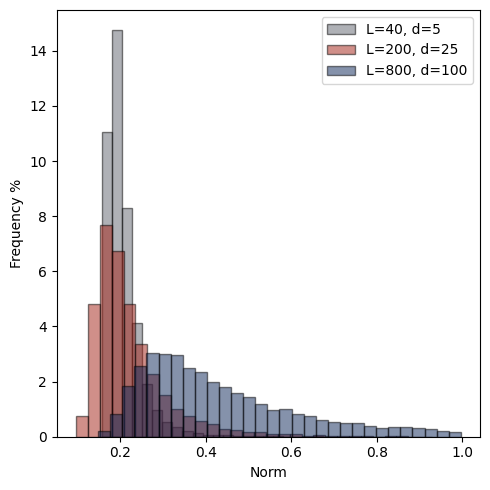

In [ ]:
pairs = [(40, 5),(200, 25),(800, 100)] # List of (L, d) pairs
n = 10000  # Number of repetitions
scale = 0.35  # Scale for the dot product

plt.figure(figsize=(5, 5))
for i in range(len(pairs)):
    L, d = pairs[i]
    norms = plot_norm_histogram(L, d, n, scale)
    plt.hist(norms, bins=30, alpha=0.5, label=f"L={L}, d={d}", 
             color=colors[2 - i], edgecolor='black', density=True) 
plt.xlabel("Norm")
plt.ylabel("Frequency %")
plt.legend()
plt.tight_layout()

# Save the plot as a PDF and display it
plt.savefig("Intuition_approx_3.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Plot Approximated Dynamics

In [ ]:
# Example usage
mu_init = [0.001, -0.001]
omega_init = [0.001, -0.001]#[0, 0]
lr = 0.01
steps = 1000000
sigma2=0.1
L=40
d=5

mu_history, omega_history, loss_history = gradient_flow(mu_init, omega_init, lr, steps, sigma2, L, d)

/tmp/tmp.8UrgZk8dxj/ipykernel_1433147/1378778357.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/tmp.8UrgZk8dxj/ipykernel_1433147/1378778357.py:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Dynamic_approx_all_time.pdf", format="pdf", bbox_inches="tight")
/home/jh3439/.conda/envs/envs_LARA/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


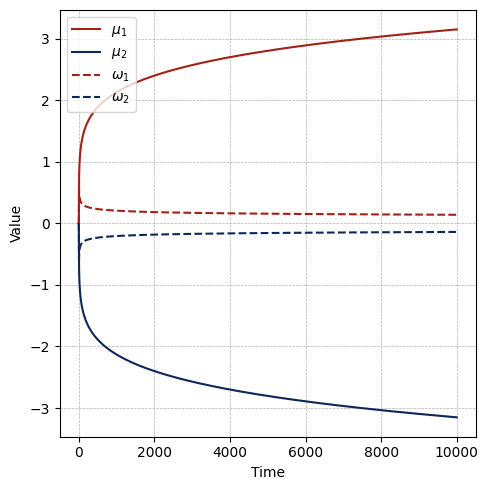

In [ ]:
colors= ['#0D2758','#A32015', "#60656F", "#DEA54B"]
time_steps = len(mu_history)
time = [t * lr for t in range(time_steps)] 


plt.figure(figsize=(5, 5))

# Plot Dynamics of Mu
plt.plot(time, mu_history[:, 0], color = colors[1], label=r"$\mu_1$")
plt.plot(time, mu_history[:, 1], color = colors[0],label=r"$\mu_2$")

# Plot Dynamics of Omega
plt.plot(time, omega_history[:, 0], color = colors[1],label=r"$\omega_1$", linestyle="--")
plt.plot(time, omega_history[:, 1], color = colors[0],label=r"$\omega_2$", linestyle="--")

# Add labels, title, and legend
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
# Save the plot as a PDF and display it
plt.savefig("Dynamic_approx_all_time.pdf", format="pdf", bbox_inches="tight")
plt.show()


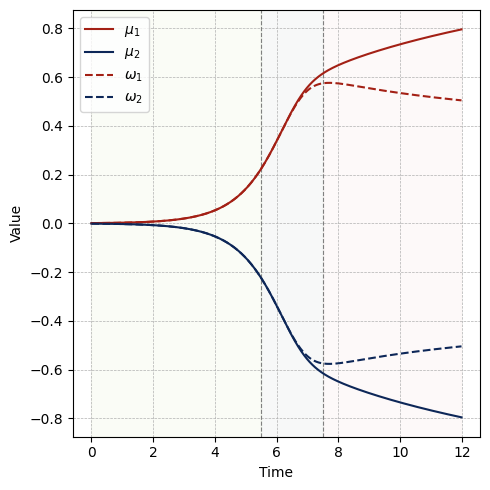

In [ ]:
time_steps = len(mu_history)
time = [t * lr for t in range(time_steps)] 
time_thr = 1200
time = time[:time_thr]

plt.figure(figsize=(5, 5))

# Highlight three stages with background colors
stage_1_end = 5.5  # End of stage 1 (in scaled time)
stage_2_end = 7.5  # End of stage 2 (in scaled time)
shade_colors = ['#E0EDC5',  '#CDD6D0','#F4DBD8']

plt.axvspan(0, stage_1_end, color=shade_colors[0], alpha=0.15)
plt.axvspan(stage_1_end, stage_2_end, color=shade_colors[1], alpha=0.15)
plt.axvspan(stage_2_end, max(time), color=shade_colors[2], alpha=0.15)

# Add vertical lines to separate the stages
plt.axvline(stage_1_end, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(stage_2_end, color="gray", linestyle="--", linewidth=0.8)

# Plot Dynamics of Mu
plt.plot(time, mu_history[:time_thr, 0], color = colors[1], label=r"$\mu_1$")
plt.plot(time, mu_history[:time_thr, 1], color = colors[0],label=r"$\mu_2$")

# Plot Dynamics of Omega
plt.plot(time, omega_history[:time_thr, 0], color = colors[1],label=r"$\omega_1$", linestyle="--")
plt.plot(time, omega_history[:time_thr, 1], color = colors[0],label=r"$\omega_2$", linestyle="--")

# Add labels, title, and legend
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
# Save the plot as a PDF and display it
plt.savefig("Dynamic_approx_begin_para.pdf", format="pdf", bbox_inches="tight")
plt.show()


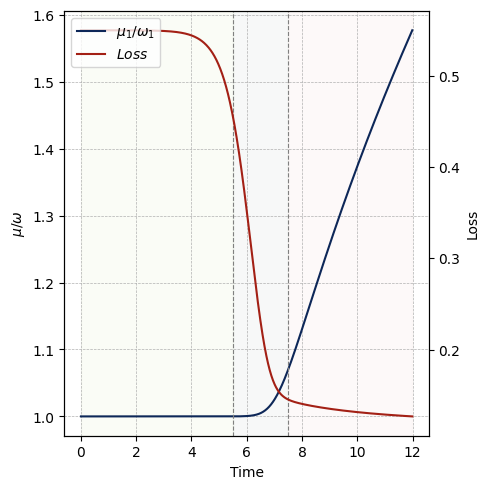

In [ ]:
time_steps = len(mu_history)
time = [t * lr for t in range(time_steps)] 
time_thr = 1200
time = time[:time_thr]

fig, ax1 = plt.subplots(figsize=(5, 5))

# Highlight three stages with background colors
stage_1_end = 5.5  # End of stage 1 (in scaled time)
stage_2_end = 7.5  # End of stage 2 (in scaled time)
shade_colors = ['#E0EDC5',  '#CDD6D0', '#F4DBD8']

ax1.axvspan(0, stage_1_end, color=shade_colors[0], alpha=0.15)
ax1.axvspan(stage_1_end, stage_2_end, color=shade_colors[1], alpha=0.15)
ax1.axvspan(stage_2_end, max(time), color=shade_colors[2], alpha=0.15)

# Plot Ratio on the left y-axis
ax1.plot(time, mu_history[:time_thr, 0] / omega_history[:time_thr, 0], color=colors[0], label=r"$\mu_1/\omega_1$")
ax1.set_xlabel("Time")
ax1.set_ylabel(r"$\mu/\omega$")
ax1.tick_params(axis="y")

# Add vertical lines to separate the stages
ax1.axvline(stage_1_end, color="gray", linestyle="--", linewidth=0.8)
ax1.axvline(stage_2_end, color="gray", linestyle="--", linewidth=0.8)

# Create a second y-axis for the loss
ax2 = ax1.twinx()  # Share the same x-axis
ax2.plot(time, loss_history[:time_thr], color=colors[1], label=r"$Loss$")
ax2.set_ylabel("Loss")
ax2.tick_params(axis="y")

# Add a grid
ax1.grid(True, linestyle='--', linewidth=0.5)

# Add a combined legend at the top-left
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.tight_layout()

# Save the plot as a PDF and display it
plt.savefig("Dynamic_approx_begin_ratio_loss.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
mu_star_ls = [calculate_mu_star(omega, sigma2, L, d)[0] for omega in omega_history]

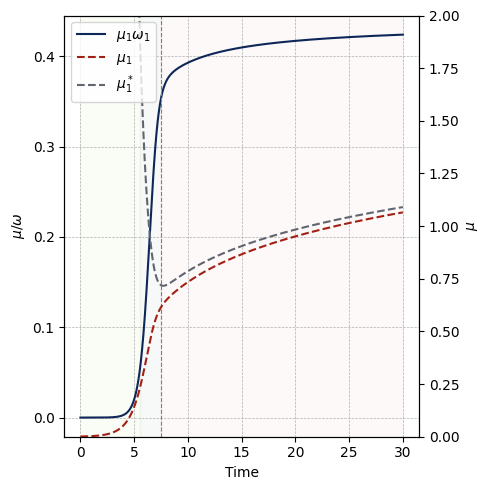

In [ ]:
time_steps = len(mu_history)
time = [t * lr for t in range(time_steps)] 
time_thr = 3000
time = time[:time_thr]

fig, ax1 = plt.subplots(figsize=(5, 5))

# Highlight three stages with background colors
stage_1_end = 5.5  # End of stage 1 (in scaled time)
stage_2_end = 7.5  # End of stage 2 (in scaled time)
shade_colors = ['#E0EDC5',  '#CDD6D0', '#F4DBD8']

ax1.axvspan(0, stage_1_end, color=shade_colors[0], alpha=0.15)
ax1.axvspan(stage_1_end, stage_2_end, color=shade_colors[1], alpha=0.15)
ax1.axvspan(stage_2_end, max(time), color=shade_colors[2], alpha=0.15)

# Plot Ratio on the left y-axis
ax1.plot(time, mu_history[:time_thr, 0] * omega_history[:time_thr, 0], color=colors[0], label=r"$\mu_1\omega_1$")
ax1.set_xlabel("Time")
ax1.set_ylabel(r"$\mu/\omega$")
ax1.tick_params(axis="y")

# Add vertical lines to separate the stages
# ax1.axvline(stage_1_end, color="gray", linestyle="--", linewidth=0.8)
ax1.axvline(stage_2_end, color="gray", linestyle="--", linewidth=0.8)

# Create a second y-axis for the loss
ax2 = ax1.twinx()  # Share the same x-axis
ax2.plot(time, mu_history[:time_thr,0], color=colors[1], label=r"$\mu_1$", linestyle="--")
ax2.plot(time, mu_star_ls[:time_thr], color=colors[2], label=r"$\mu_1^*$", linestyle="--")
ax2.set_ylabel(r"$\mu$")
ax2.tick_params(axis="y")
ax2.set_ylim(0,2)

# Add a grid
ax1.grid(True, linestyle='--', linewidth=0.5)

# Add a combined legend at the top-left
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.tight_layout()

# Save the plot as a PDF and display it
plt.savefig("Dynamic_approx_begin_prod.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
# Example usage
mu_init = np.random.normal(0, 0.1, 4)
omega_init = np.random.normal(0, 0.1, 4)
lr = 0.01
steps = 1000000
sigma2 = 0.01
L=40
d=5

mu_history, omega_history, loss_history = gradient_flow(mu_init, omega_init, lr, steps, sigma2, L, d)

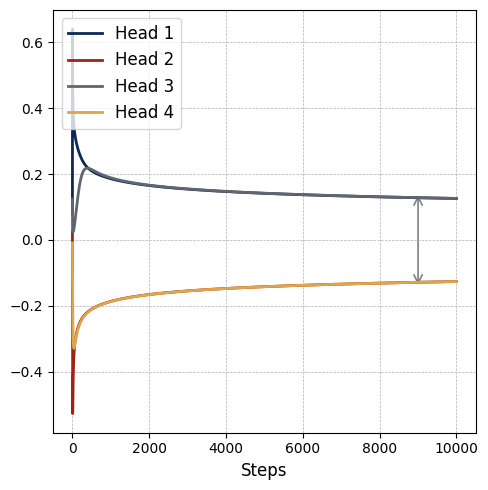

In [ ]:
colors= ['#0D2758','#A32015', "#60656F", "#DEA54B"]
time_steps = len(mu_history)
time = [t * lr for t in range(time_steps)] 

# Create the figure
plt.figure(figsize=(5, 5))

for idx in range(4):
    plt.plot(time, [mu[idx] for mu in omega_history], color=colors[idx], linestyle='-', linewidth=2, label=f'Head {idx + 1}')
    
# Add horizontal reference line
# plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
# plt.axhline(y=0.12, color='black', linestyle='--', linewidth=1)
# plt.axhline(y=-0.12, color='black', linestyle='--', linewidth=1)


# Add a double arrow
arrow = FancyArrowPatch(
    posA=(9000, -0.145),  # Start position (x, y)
    posB=(9000, 0.145),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# # Customize x-axis ticks
# xticks = np.linspace(0, 400000, num=9)  # Generate ticks (e.g., 0, 100000, 200000, ...)
# plt.xticks(ticks=xticks, labels=[f'{int(tick/1000)}k' for tick in xticks])

# # Customize y-axis ticks
# yticks = plt.yticks()[0]
# plt.yticks(ticks=np.append(yticks, [0.12, -0.12]), labels=[f'{tick:.2f}' if tick in [0.12, -0.12] else f'{tick:.2f}' for tick in np.append(yticks, [0.12, -0.12])])

# plt.text(180000, 0.16, "Positive Heads (2)", fontsize=15, color="black")
# plt.text(180000, 0.03, "Dummy Heads (3)", fontsize=15, color="black")
# plt.text(170000, -0.2, "Negative Heads (1&4)", fontsize=15, color="black")

# # Add labels, title, and legend
# plt.xlim(-10000, 400000)
plt.xlabel('Steps', fontsize=12)
#plt.ylabel('Average of Diagnal Elements of KQ', fontsize=12)
#plt.title('QK Dynamics', fontsize=14)
plt.legend(fontsize=12, loc ="upper left")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Approx_Head_4_KQ_dynamic.pdf", format="pdf", bbox_inches="tight")
plt.show()

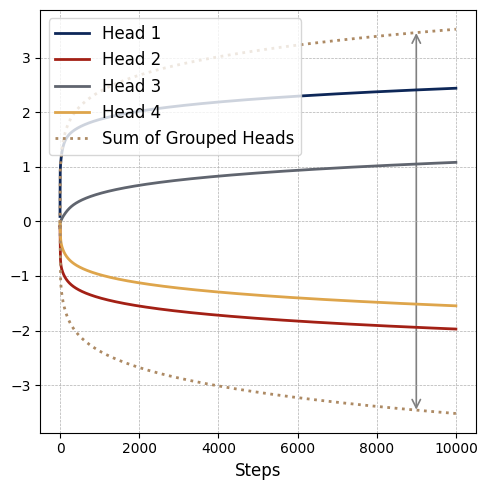

In [ ]:
colors= ['#0D2758','#A32015', "#60656F", "#DEA54B"]
time_steps = len(mu_history)
time = [t * lr for t in range(time_steps)] 

# Create the figure
plt.figure(figsize=(5, 5))

for idx in range(4):
    plt.plot(time, [mu[idx] for mu in mu_history], color=colors[idx], linestyle='-', linewidth=2, label=f'Head {idx + 1}')
    
sum_negative = [mu[2]+mu[0] for mu in mu_history]
plt.plot(time, sum_negative, color="#AD8A64", linestyle=':', linewidth=2, label=f'Sum of Grouped Heads')
sum_negative = [mu[3]+mu[1] for mu in mu_history]
plt.plot(time, sum_negative, color="#AD8A64", linestyle=':', linewidth=2)

# Add a double arrow
arrow = FancyArrowPatch(
    posA=(9000, -3.5),  # Start position (x, y)
    posB=(9000, 3.5),  # End position (x, y)
    arrowstyle='<->',  # Double-headed arrow
    mutation_scale=15,  # Size of the arrow
    color='gray',  # Color of the arrow
    linewidth=1.2,  # Line width
)
plt.gca().add_patch(arrow)

# plt.xlim(-10000, 400000)
plt.xlabel('Steps', fontsize=12)
#plt.ylabel('Value of the Last Element of OV', fontsize=12)
#plt.title('OV Dynamics', fontsize=14)
plt.legend(fontsize=12, loc ="upper left")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Approx_Head_4_OV_dynamic.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [19]:
# Load the .pth file
n_layers, d, n_head = 1,6,3
model_path = f"saved_models/Layer_{n_layers}_Head_{n_head}_d_{d}_dx1_{3}_dx2_{3}trained_model_0119.pth"
model_head_load = torch.load(model_path, map_location=torch.device(device), weights_only=True)
model_head = model_head_load['model']

print(f"Keys of Saved Data: {model_head_load.keys()}")
print(f"Keys of Saved Model: {model_head_load['model'].keys()}")

Keys of Saved Data: dict_keys(['final_loss', 'training_losses', 'validation_losses', 'model'])
Keys of Saved Model: odict_keys(['attention_layer.q_proj.weight', 'attention_layer.k_proj.weight', 'attention_layer.v_proj.weight', 'attention_layer.o_proj.weight'])


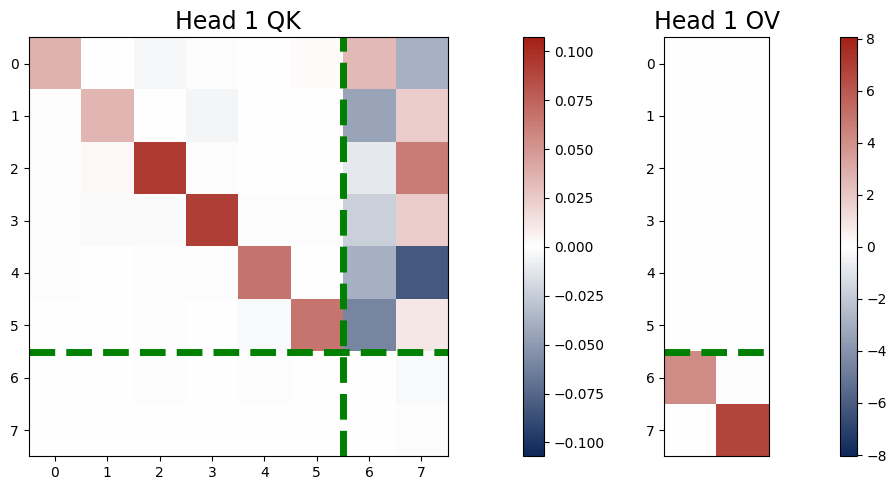

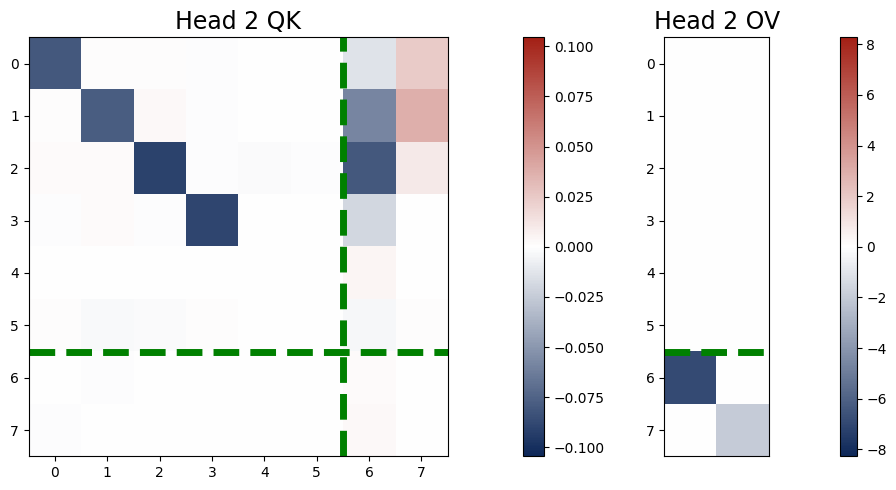

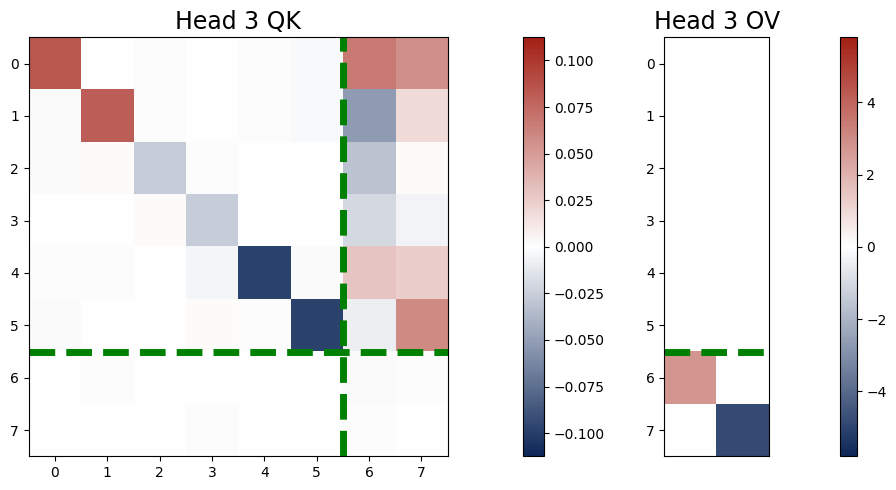

In [ ]:
plot_attn_matrices(model_head, n_layers, d, n_head, [1.15,1.2], dy=2, save = False)

In [ ]:
model_head_load['final_loss']

0.07664265483617783